In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from dataclasses import dataclass
import sklearn
from scipy.stats import norm
import matplotlib.pyplot as plt

In [39]:
from google.colab import files
uploaded=files.upload()

Saving in-vehicle-coupon-recommendation.csv to in-vehicle-coupon-recommendation (2).csv


In [40]:
#Reading the original dataset
raw_data = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')

In [41]:
#Number of records
raw_data.shape

(12684, 26)

In [42]:
#Checking a sample of data
raw_data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [43]:
#Checking the information about the features
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [44]:
#Checking for null values
(raw_data.isna().sum() / len(raw_data)) * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

##### **Inference**:

*   Column "**car**" has 99% null values. Imputing values to this column which is majorly null can impact the prediction with changes which might not reflect the reality. So, we can drop the column.
*   Other columns like **Bar**, **CoffeeHouse**, **CarryAway**, **RestaurantLessThan20**, and **Restaurant20To50** have around 1% of null values which can be imputed with values depending on the type and nature of the column.



In [45]:
#Checking for empty or Nan values
raw_data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [46]:
#Checking for duplicates
raw_data.duplicated().sum()

74

In [47]:
#Displaying the duplicate rows
raw_data[raw_data.duplicated()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


Dropping the duplicate rows and dropping the "**car**" column.

In [48]:
#Dropping duplicates
raw_data = raw_data.drop_duplicates()
len(raw_data)

12610

In [49]:
#Dropping columns with higher missing values
raw_data = raw_data.dropna(axis=1, thresh=0.2*len(raw_data))

###Data Imputation :

We have observed that for the columns which have null values, the missing percentage is less than 5%. Data imputation can be done for columns using Mode or Most frequent category imputation because they are categorical columns.

In [50]:
#Data Imputation
raw_data = raw_data.fillna(raw_data.mode().iloc[0])

In [51]:
#Verifying the dataset
(raw_data.isna().sum() / len(raw_data)) * 100

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
time                    0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ5min        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Y                       0.0
dtype: float64

In [52]:
for col in raw_data:
    print(col,":",raw_data[col].value_counts())

destination : destination
No Urgent Place    6266
Home               3230
Work               3114
Name: count, dtype: int64
passanger : passanger
Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: count, dtype: int64
weather : weather
Sunny    10011
Snowy     1397
Rainy     1202
Name: count, dtype: int64
temperature : temperature
80    6475
55    3830
30    2305
Name: count, dtype: int64
time : time
6PM     3220
7AM     3114
10AM    2271
2PM     2006
10PM    1999
Name: count, dtype: int64
coupon : coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64
expiration : expiration
1d    7031
2h    5579
Name: count, dtype: int64
gender : gender
Female    6469
Male      6141
Name: count, dtype: int64
age : age
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name:

## Exploratory Data Analysis:

##Univariate Analysis

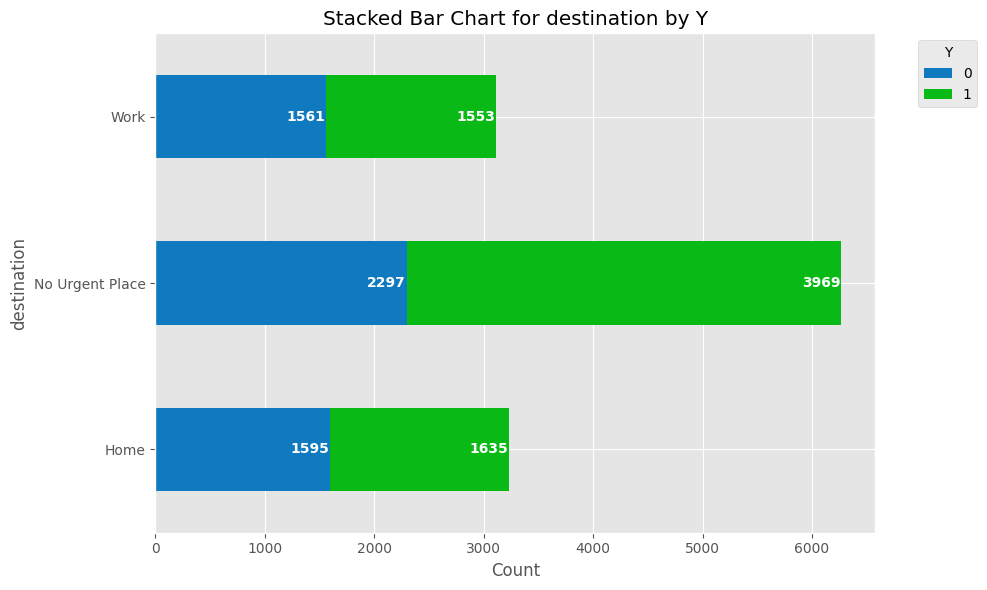

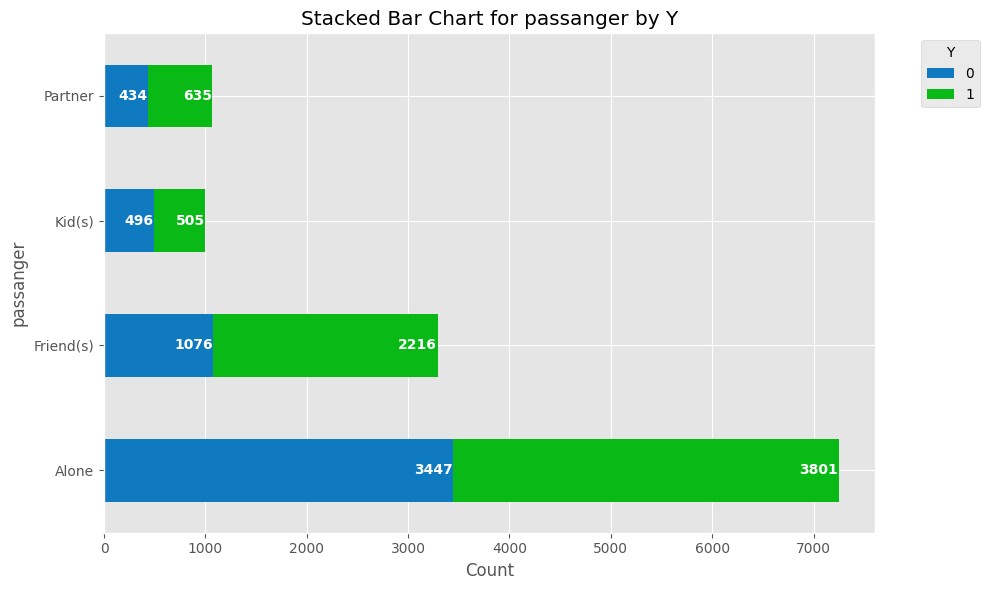

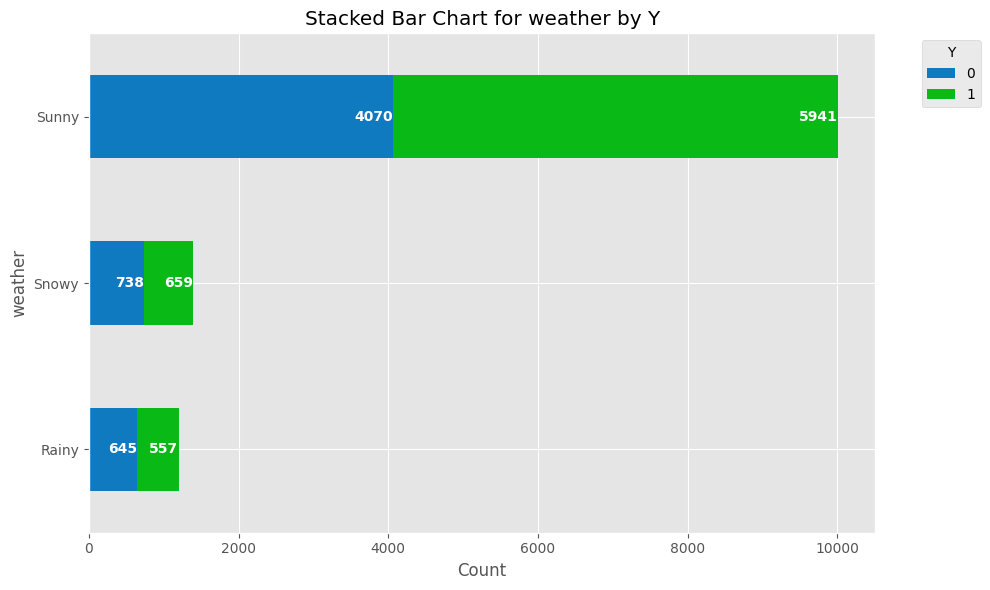

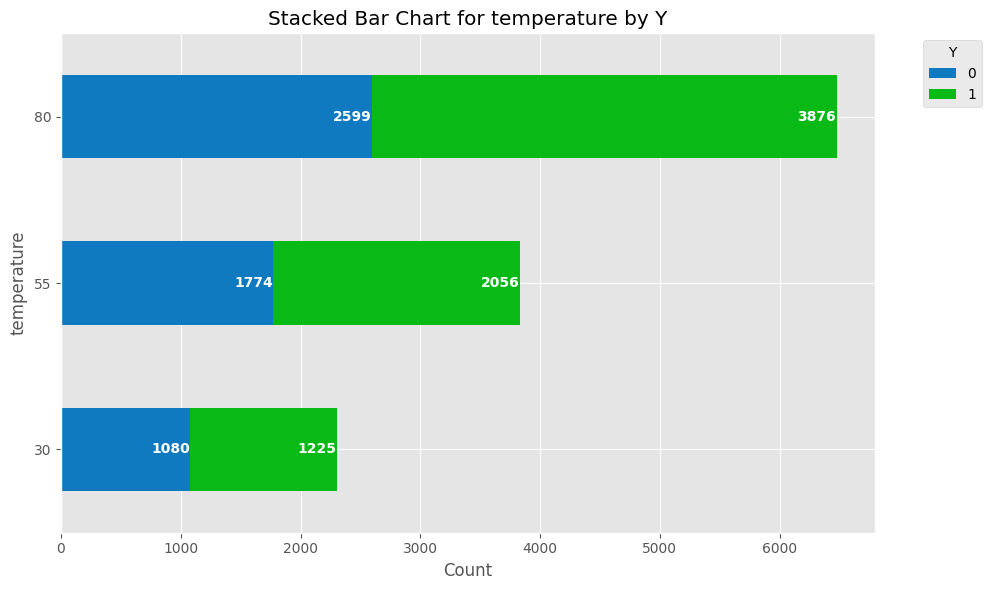

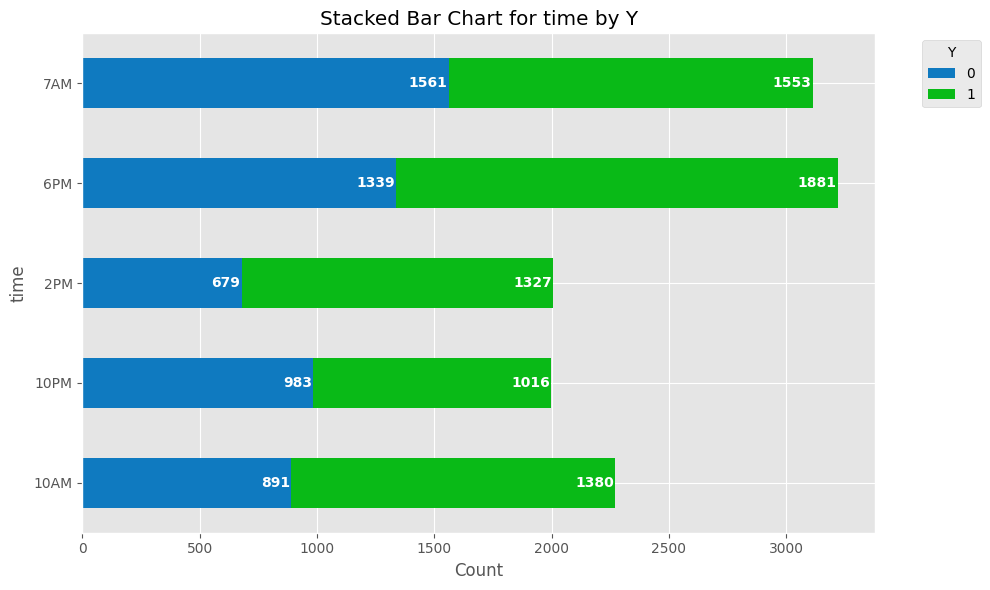

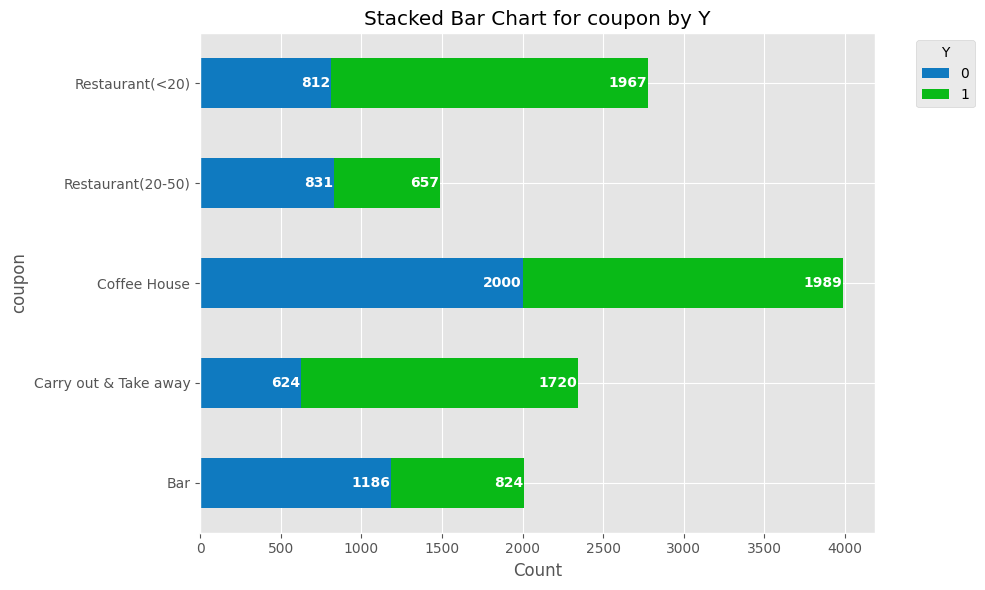

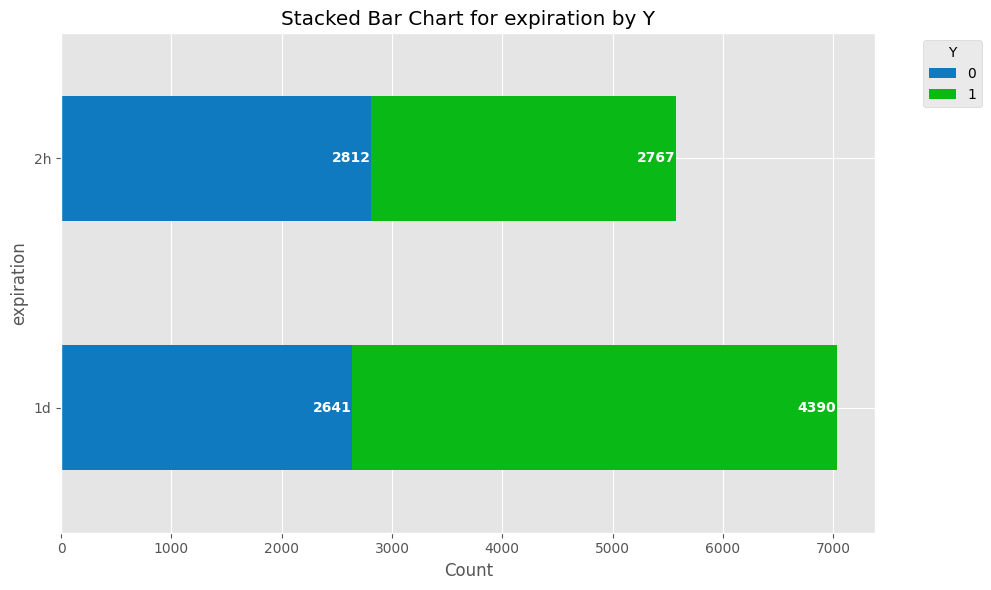

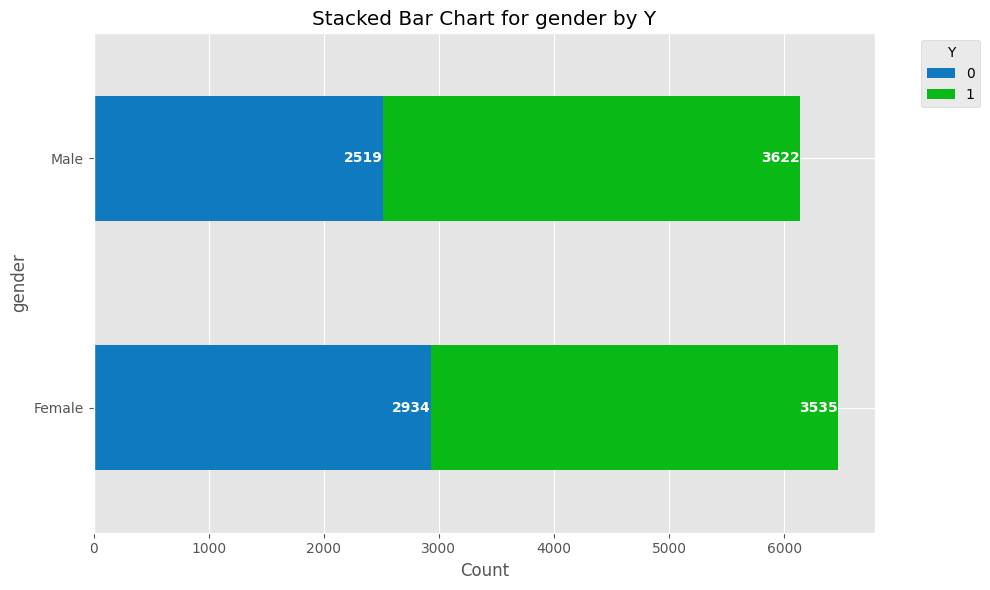

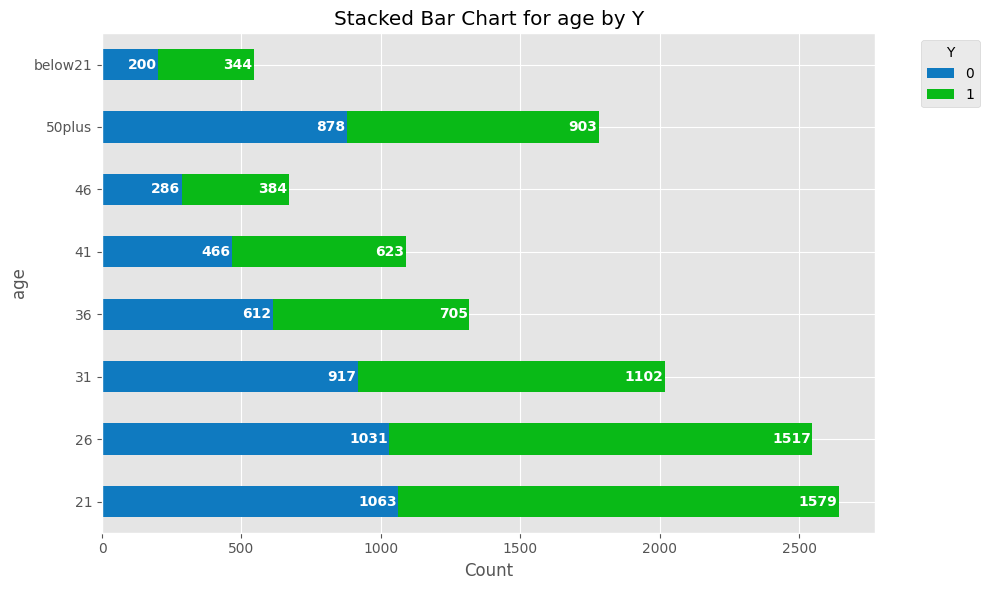

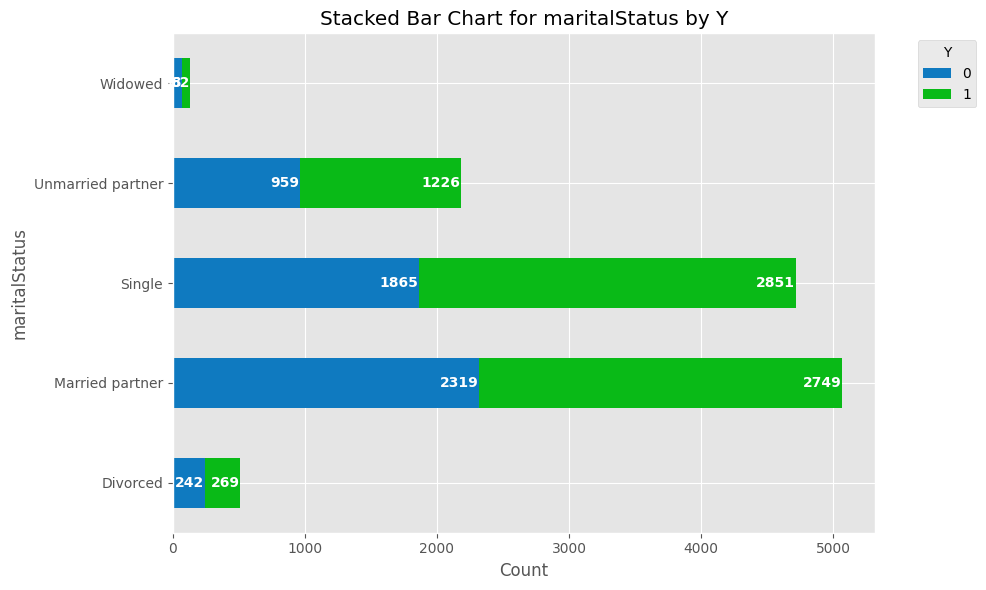

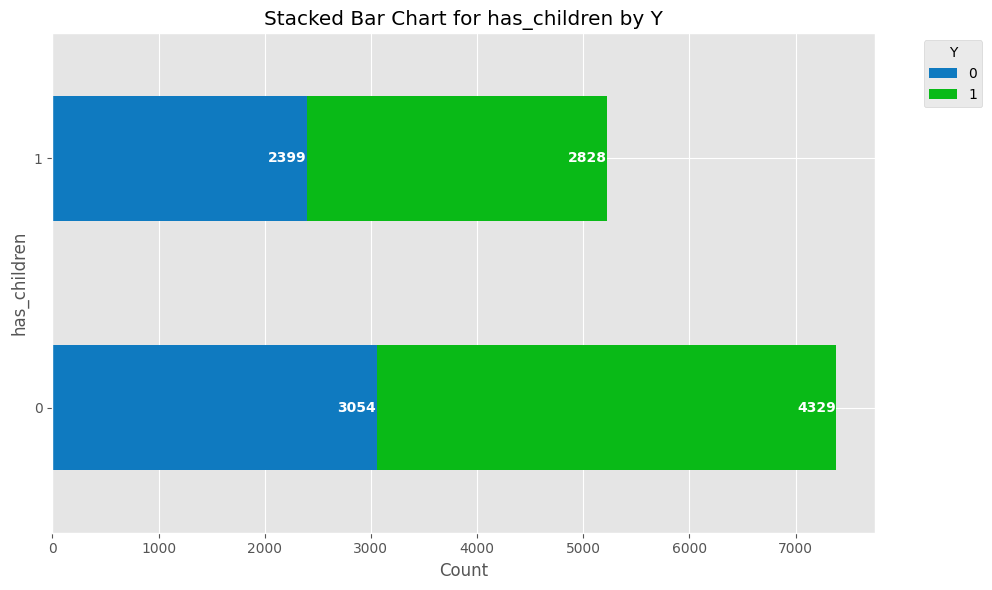

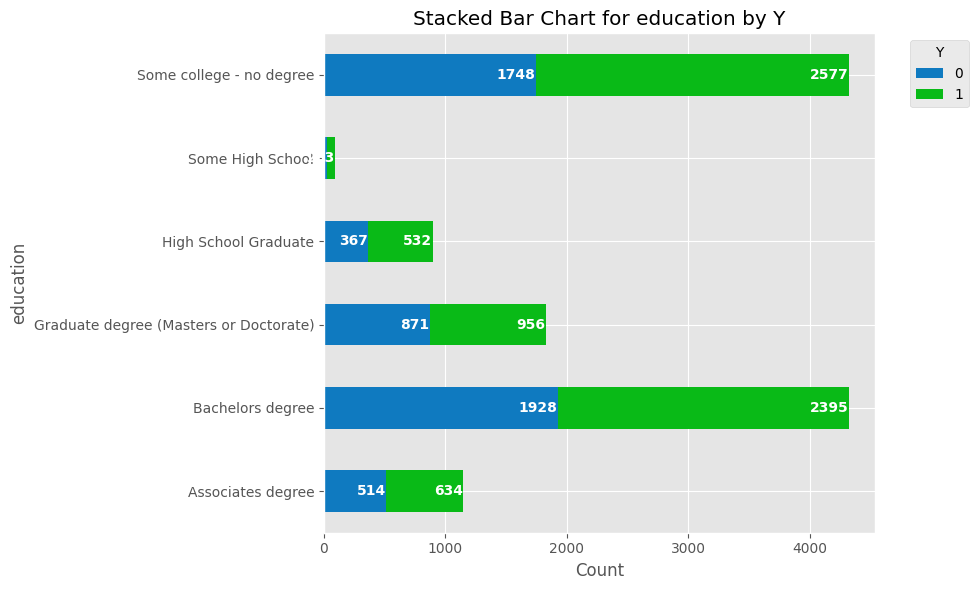

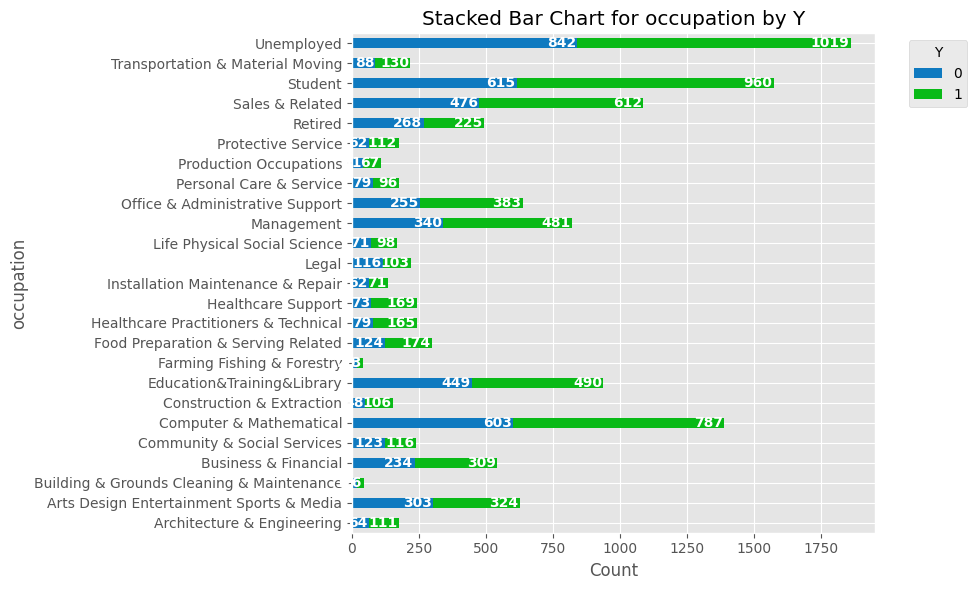

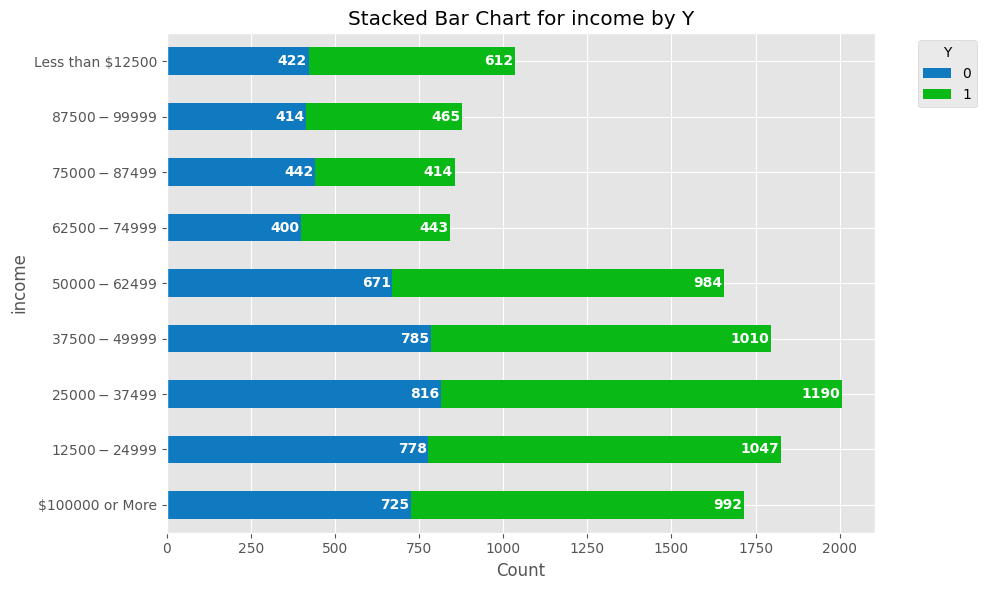

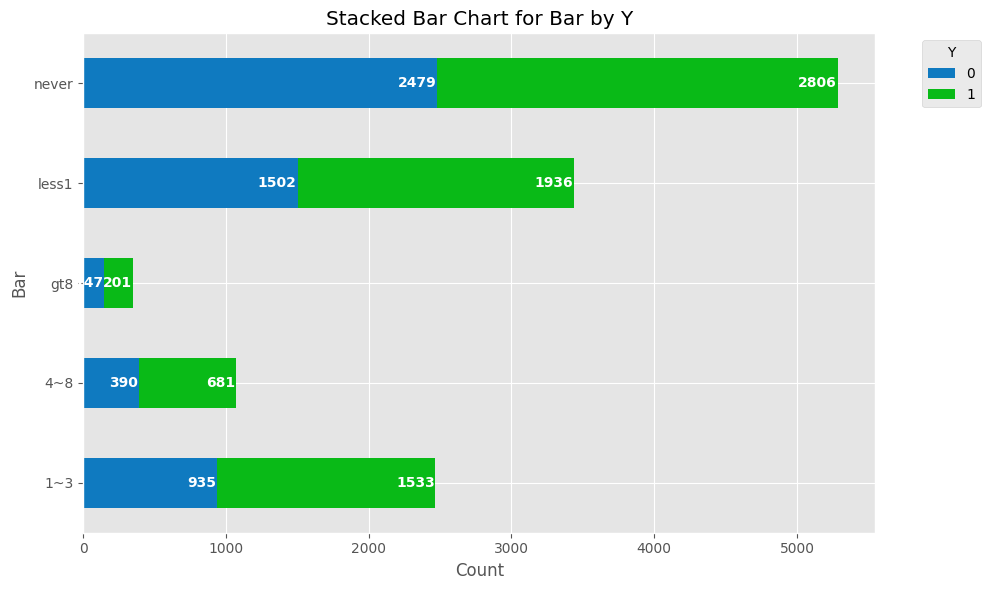

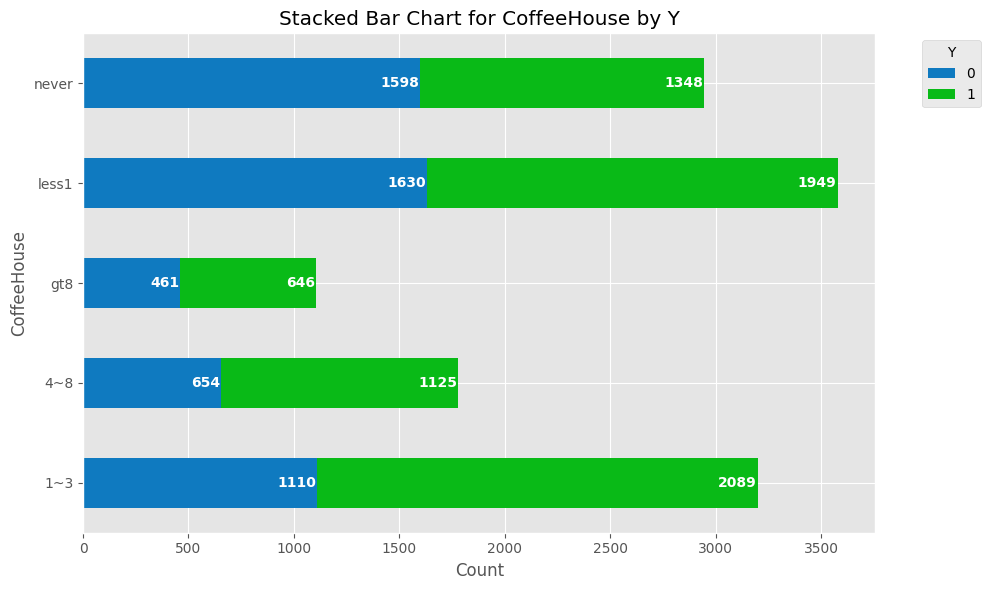

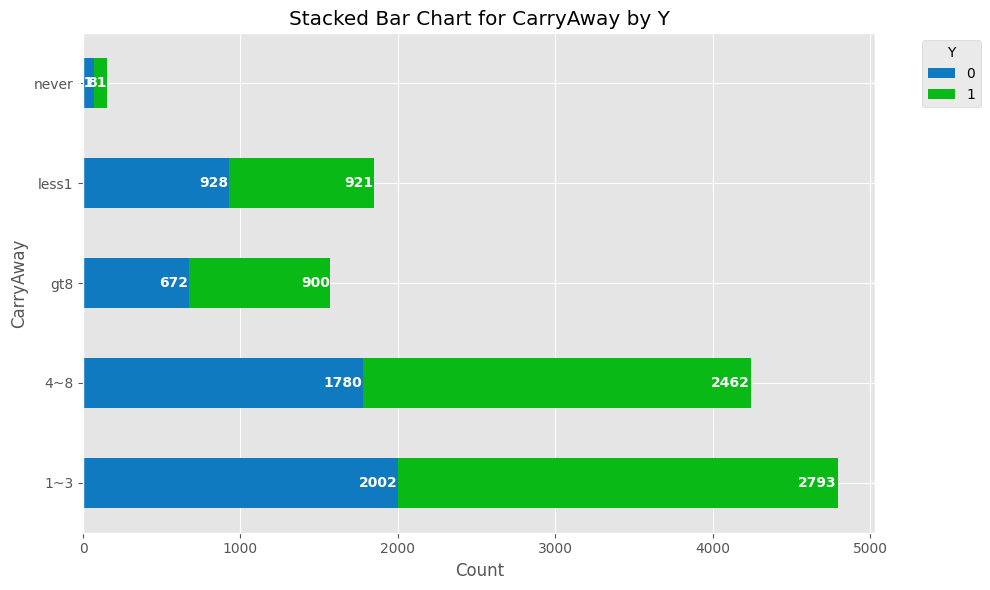

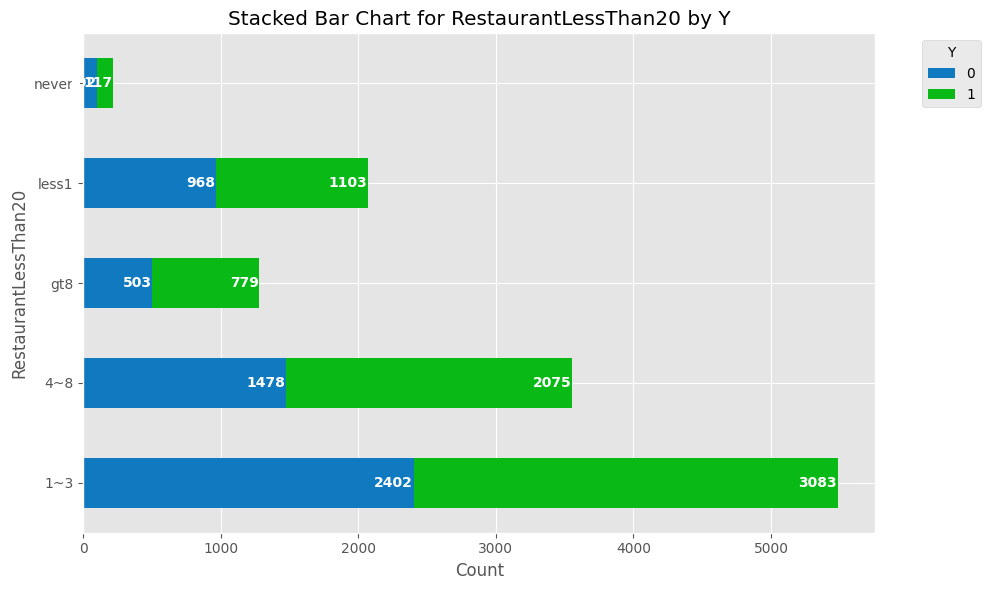

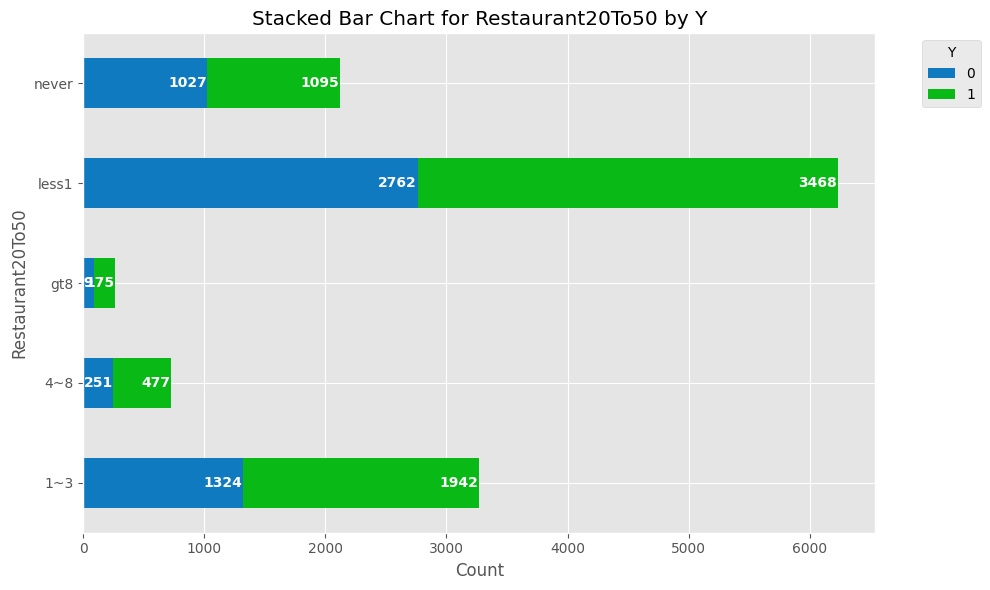

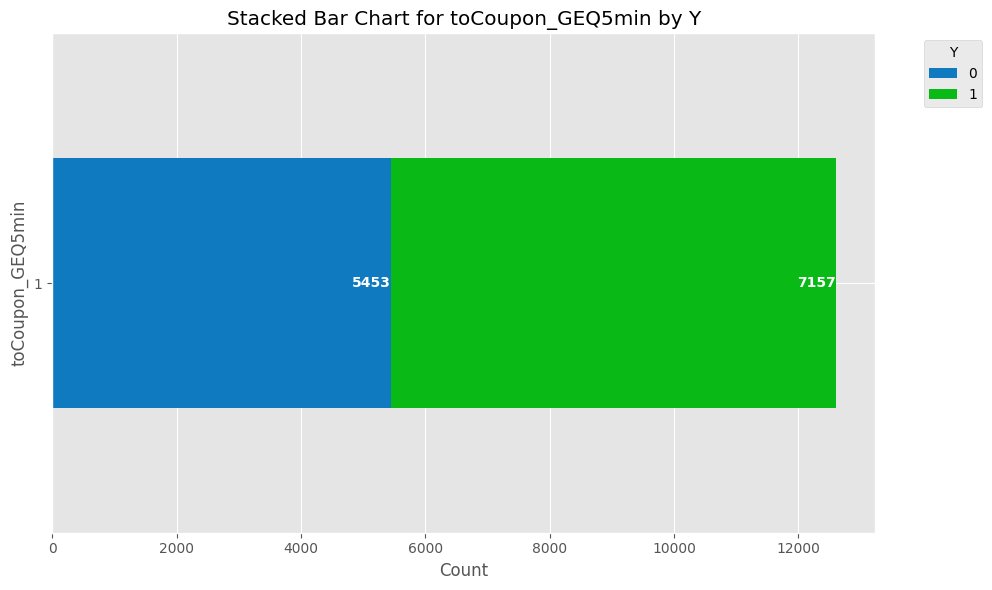

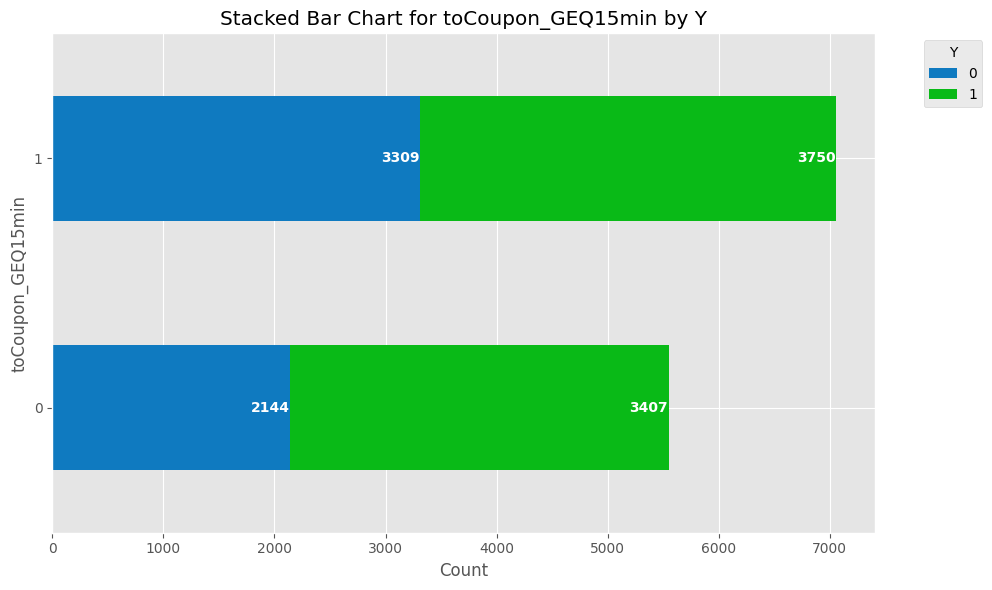

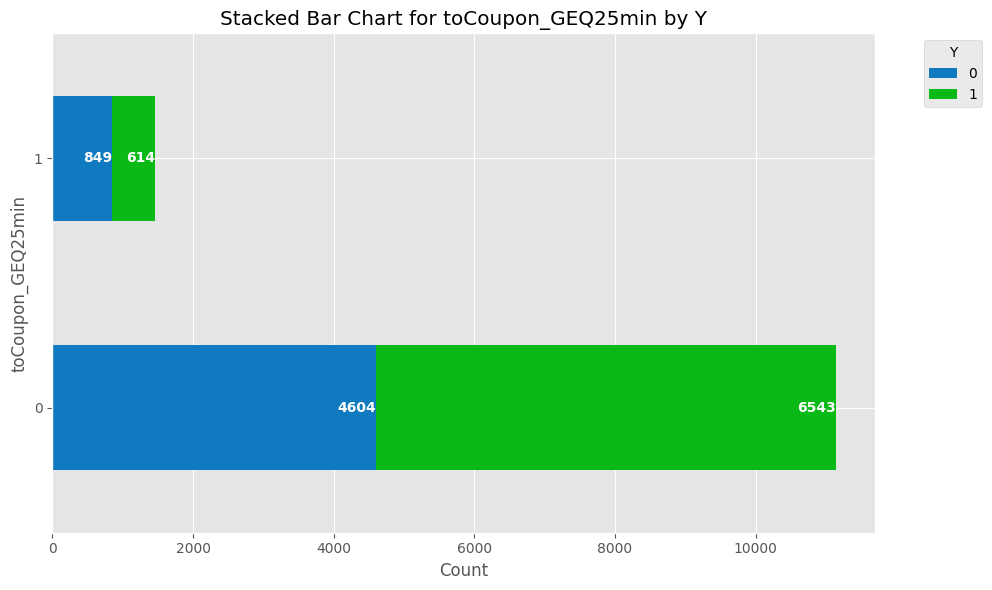

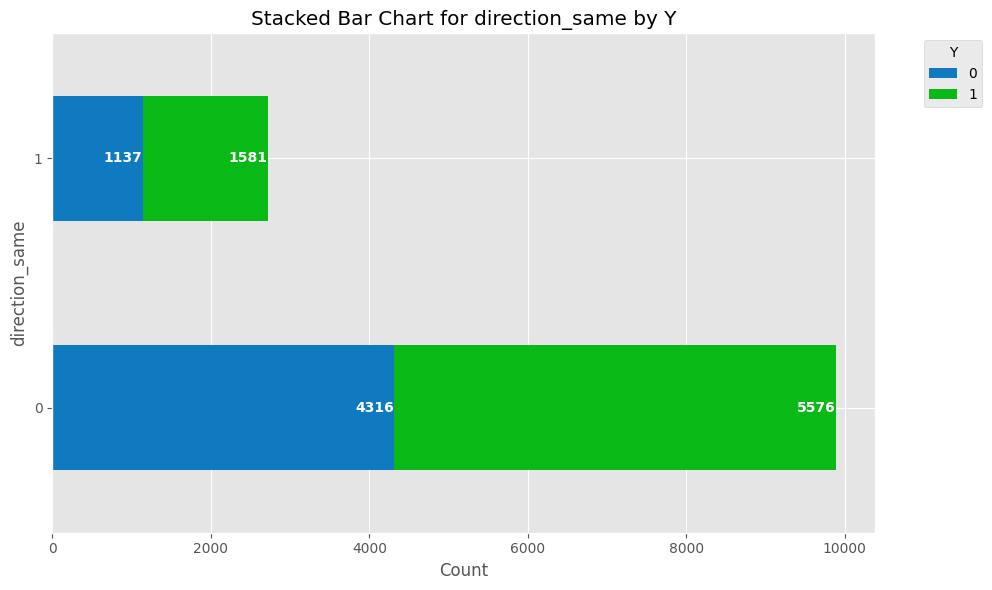

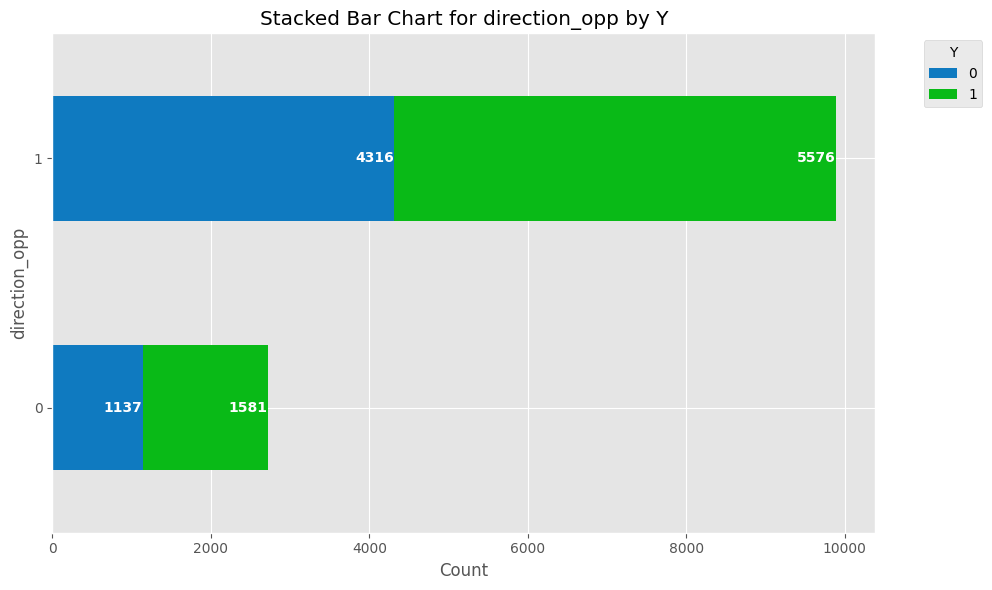

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')

color_palette = ["#0F7AC0", "#09BA17"]

def is_categorical(column, data):
    return data[column].dtype == 'object' or len(data[column].unique()) < 10

# Pivot data for stacked bar chart
def pivot_data_for_stacked_bar(data, column, stack_by):
    pivoted_data = data.groupby([column, stack_by]).size().unstack(fill_value=0)
    return pivoted_data

# Function to add text inside the bars
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        width = rect.get_width()
        height = rect.get_height()
        x = rect.get_x()
        y = rect.get_y()
        label_text = f'{width:.0f}'
        label_x = x + width - (spacing if width > spacing else 0)
        label_y = y + height / 2
        if width > spacing:
            ax.text(label_x, label_y, label_text, ha='right', va='center', color='white', weight='bold')

# Plotting function for horizontal stacked bar charts with values in bars
def plot_stacked_barh_with_values(data, column, ax, palette=None):
    pivoted_data = pivot_data_for_stacked_bar(data, column, 'Y')
    bars = pivoted_data.plot(kind='barh', stacked=True, ax=ax, color=palette, legend=True)
    ax.legend(title='Y', bbox_to_anchor=(1.05, 1), loc='upper left')
    add_value_labels(ax)


for column in raw_data.columns[:-1]:
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    if is_categorical(column, raw_data):
        plot_stacked_barh_with_values(raw_data, column, ax, palette=color_palette)
        plt.title(f'Stacked Bar Chart for {column} by Y')
    else:
        continue

    plt.xlabel('Count')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()


In [54]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

##Frequency distribution of each feature class with respect to target variable

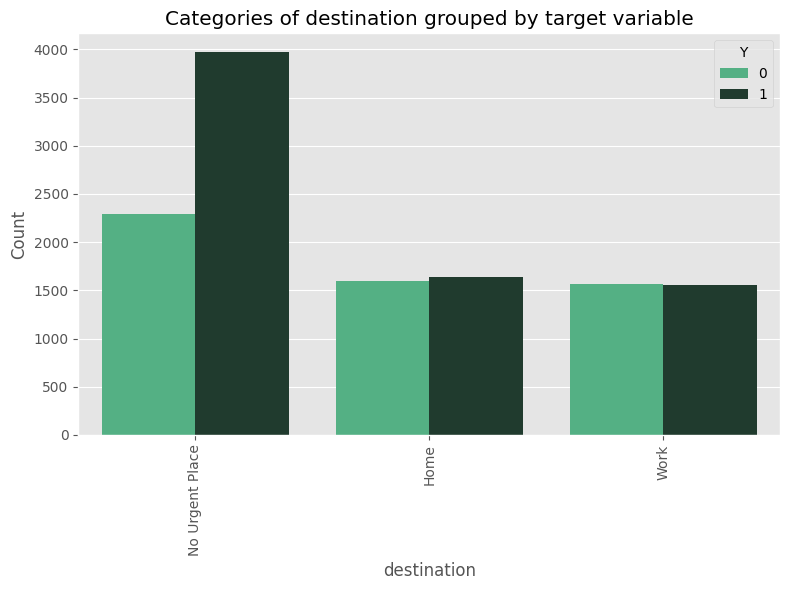

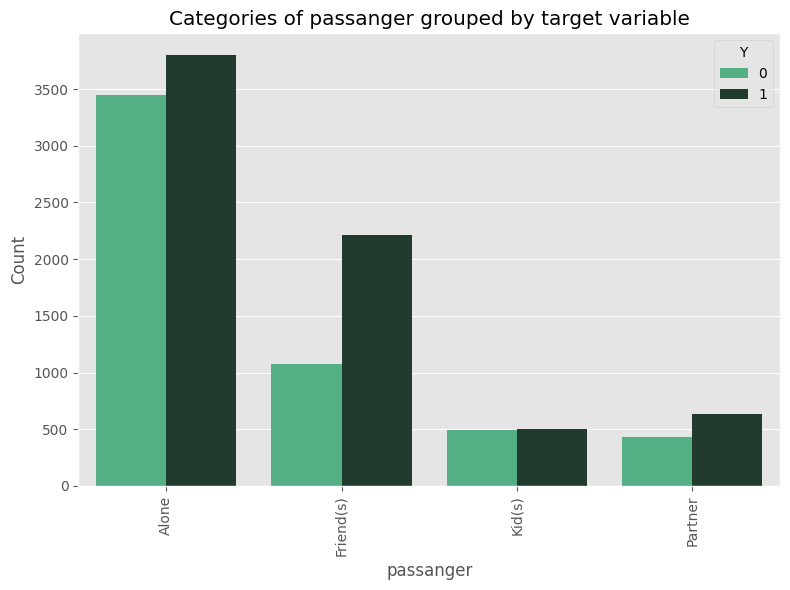

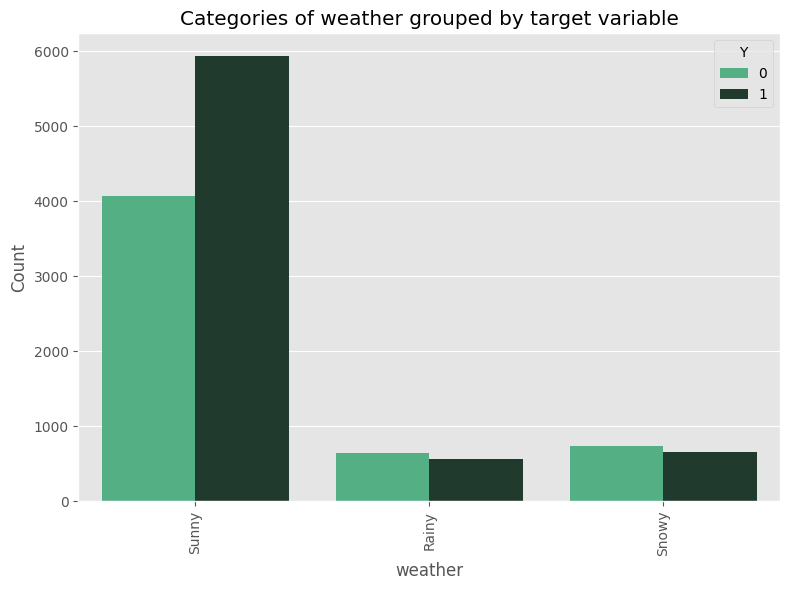

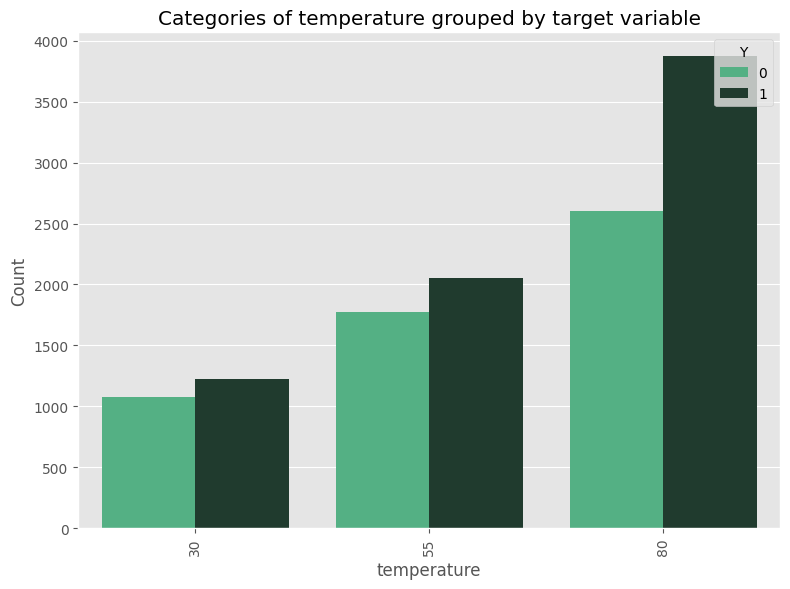

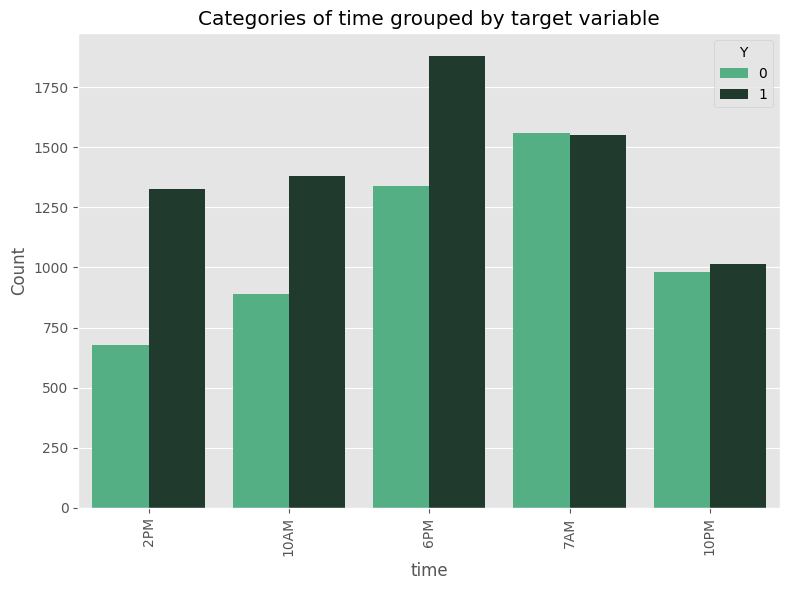

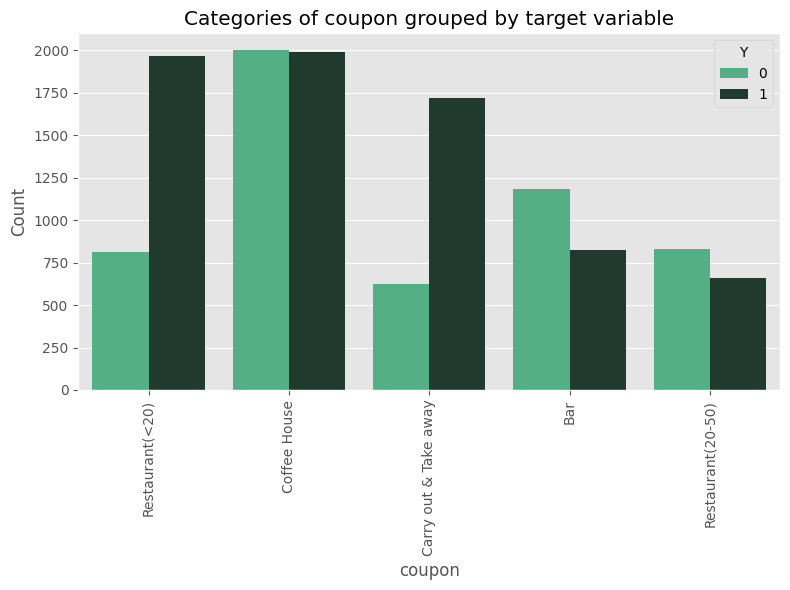

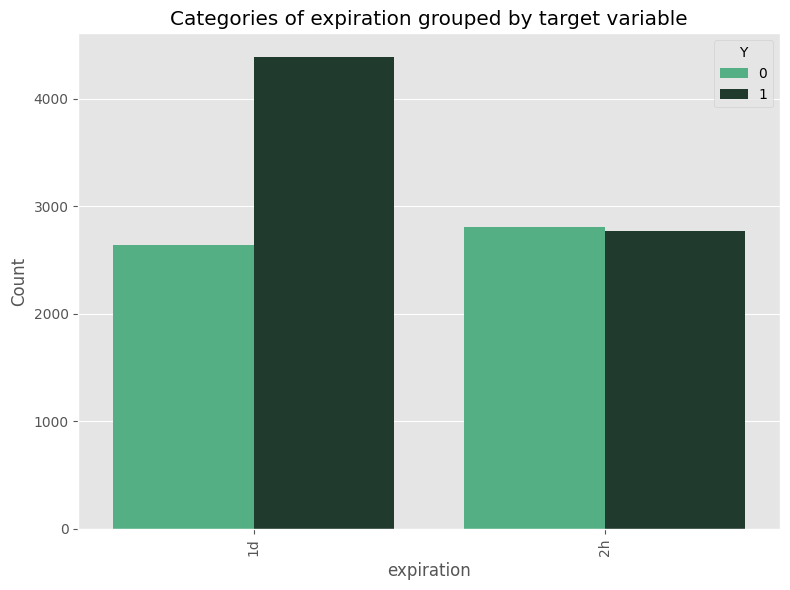

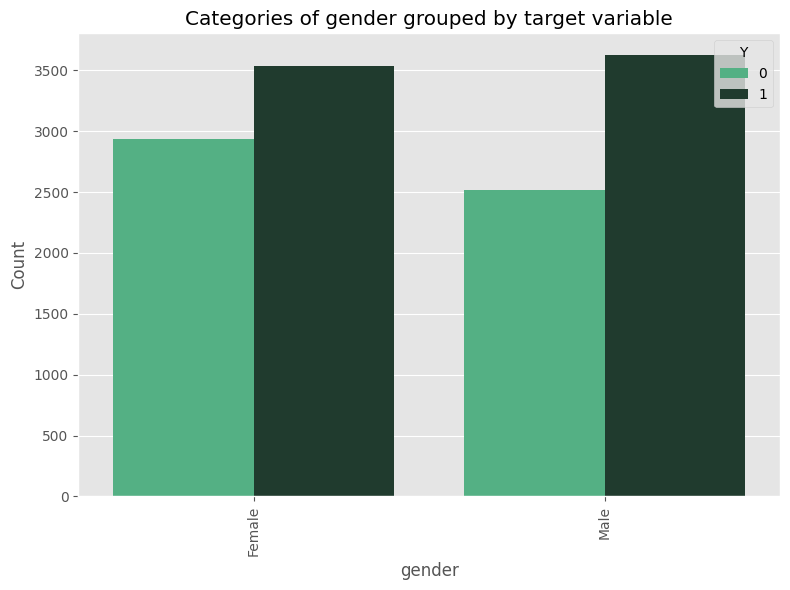

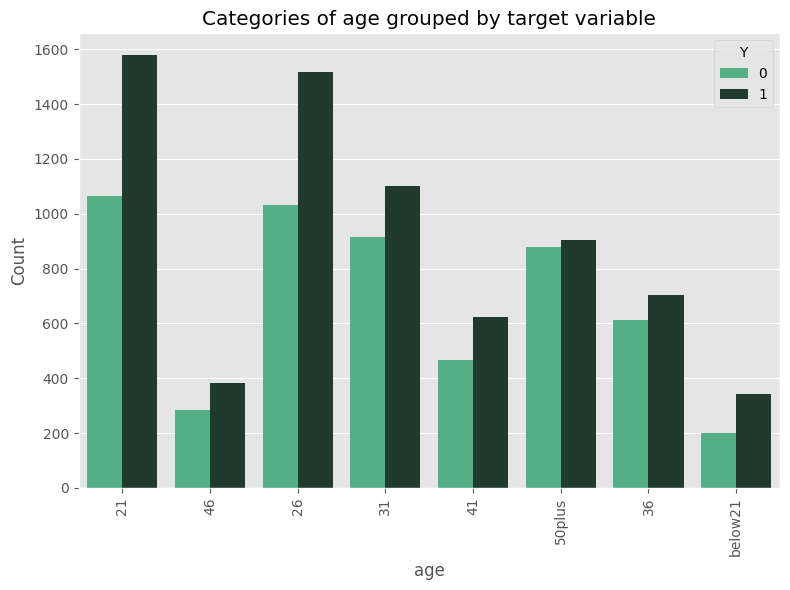

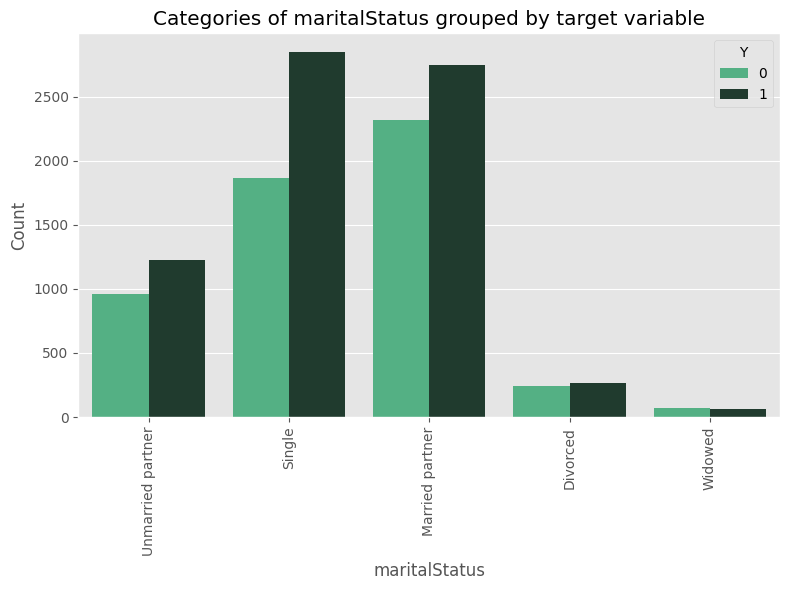

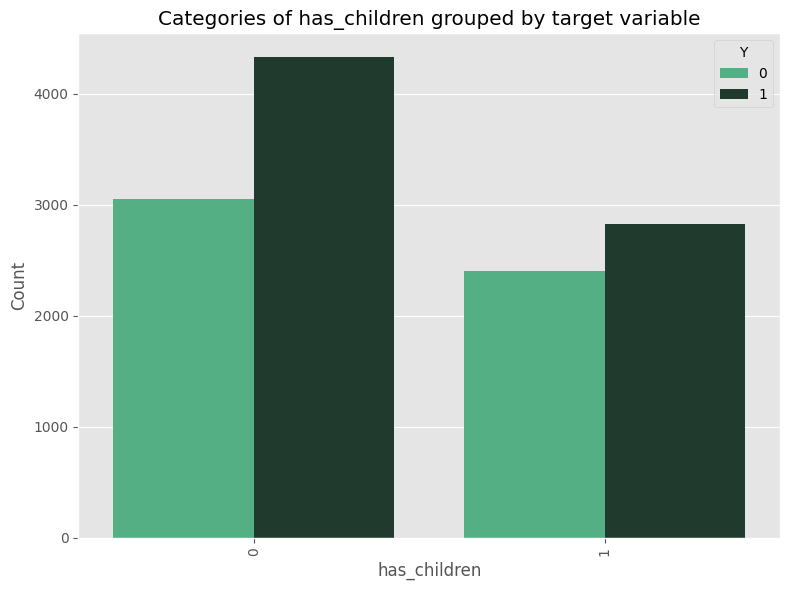

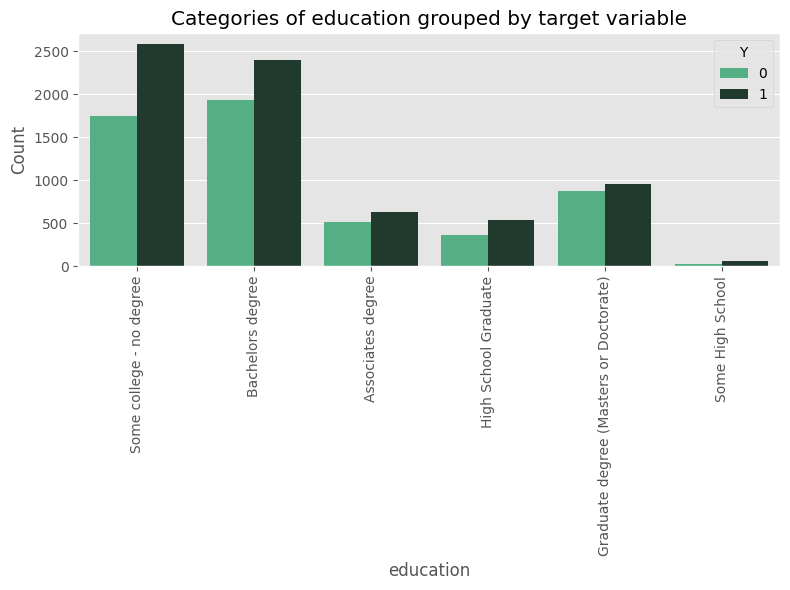

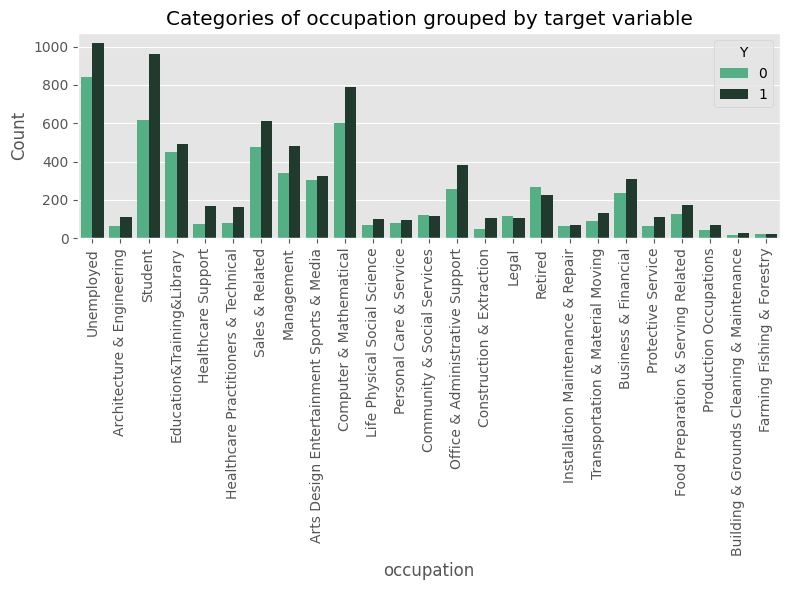

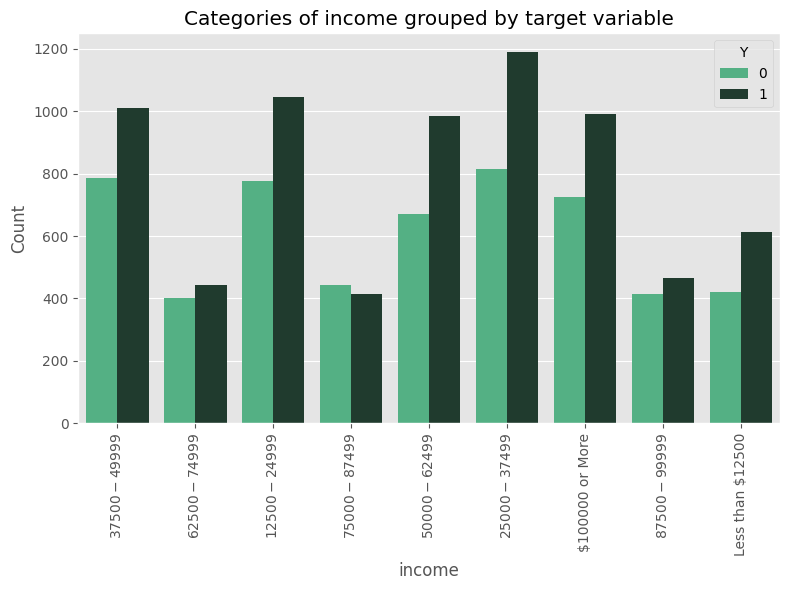

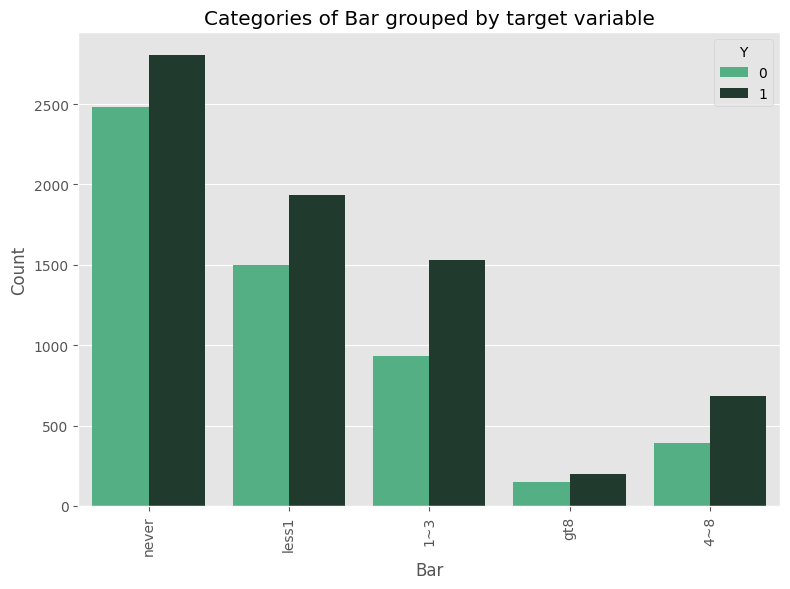

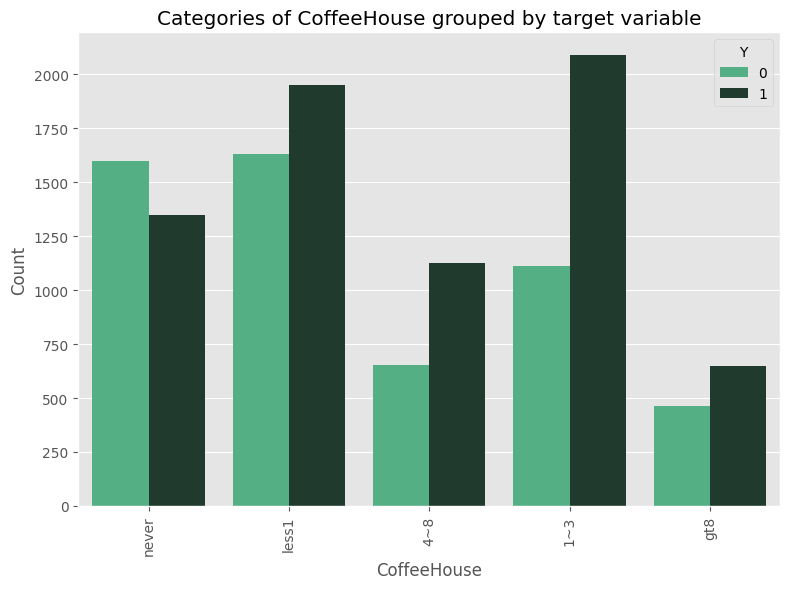

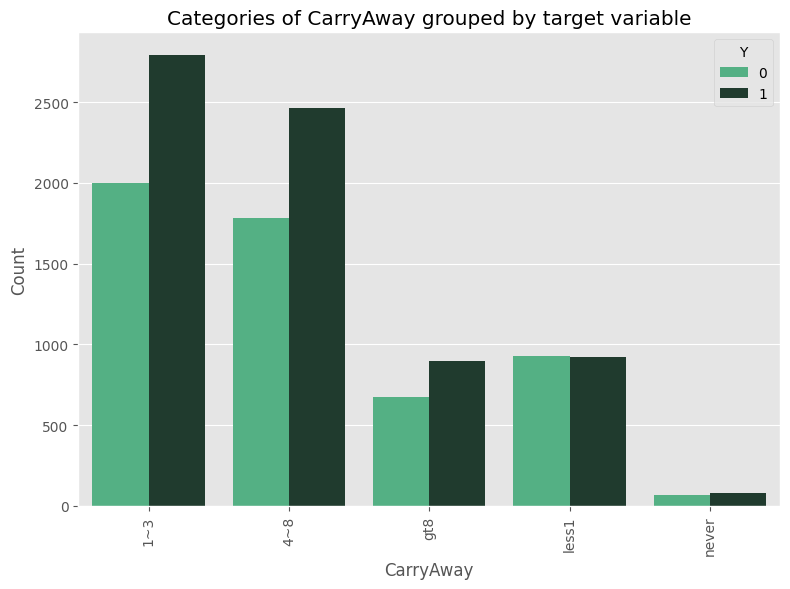

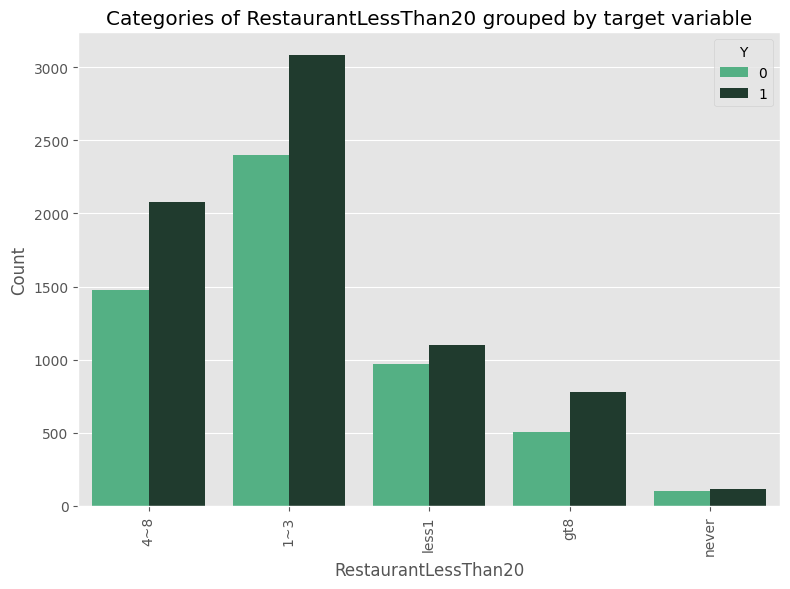

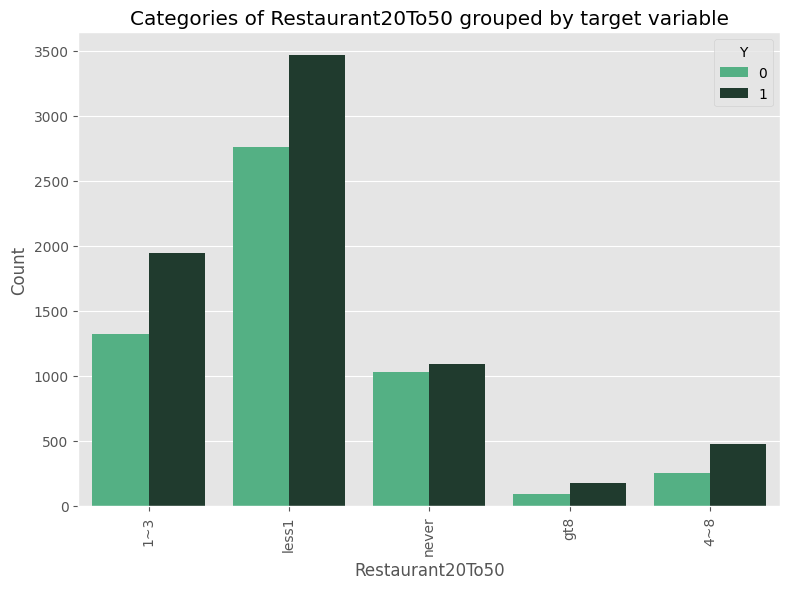

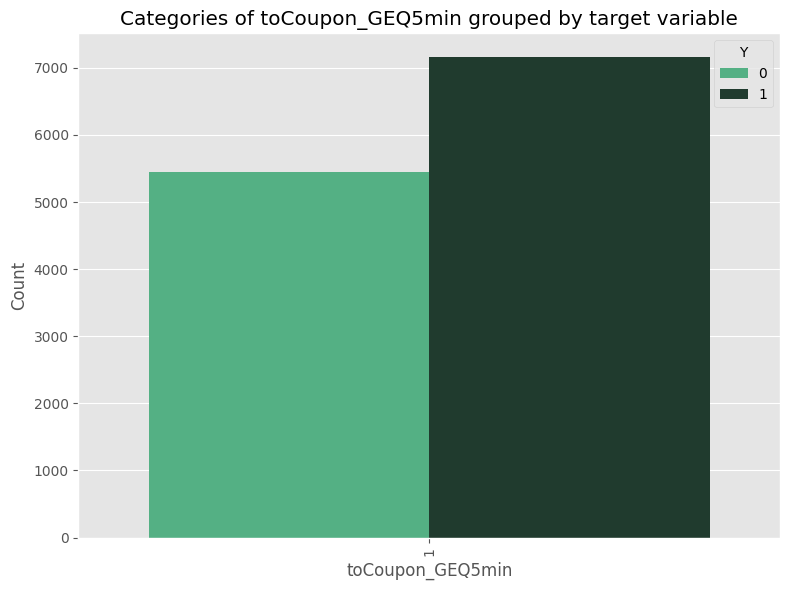

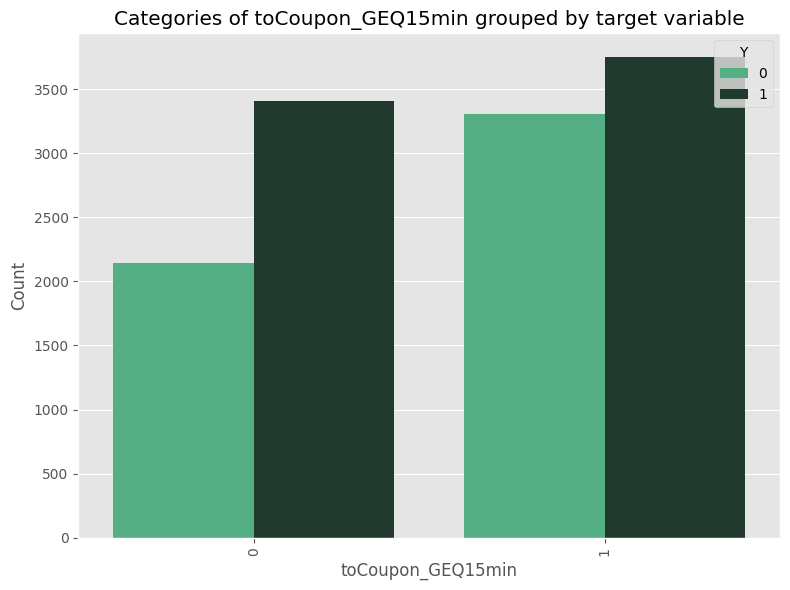

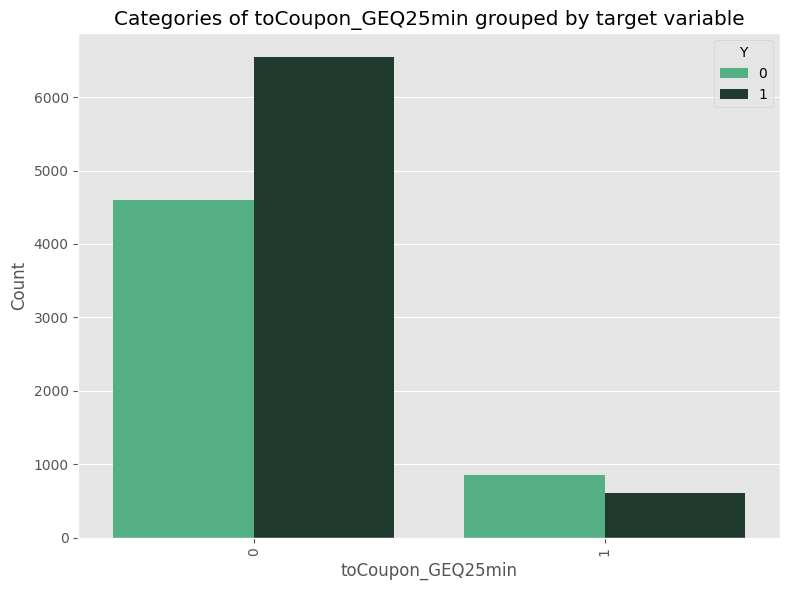

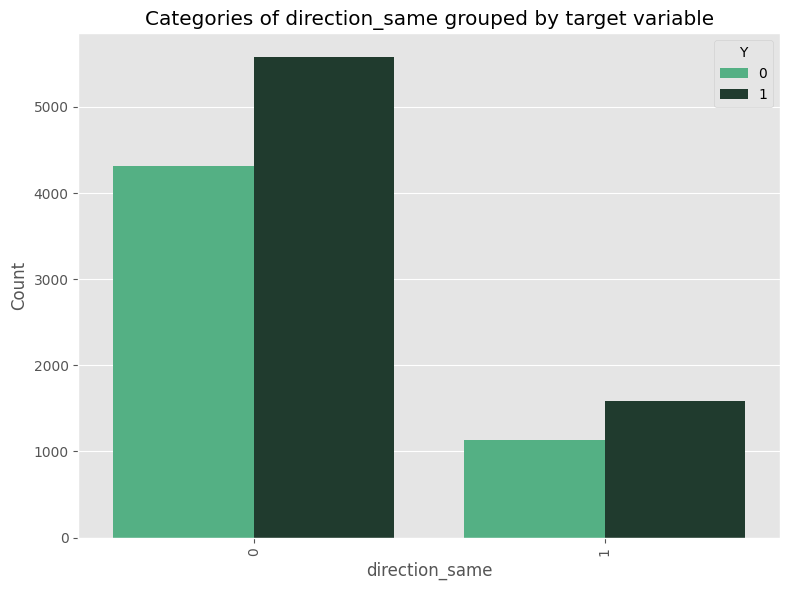

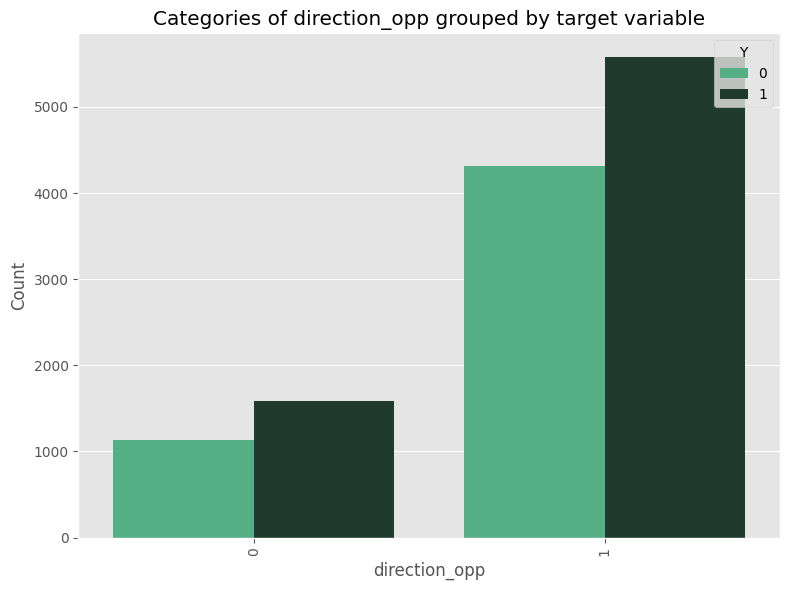

In [55]:
#Frequency distribution of each feature with respect to target
import matplotlib.pyplot as plt
for col in raw_data:
  if col!='Y':
    plt.figure(figsize=(8, 6))
    sns.countplot(data=raw_data, x=col, hue='Y', palette=["#45bf84","#1b402e"])
    plt.title(f'Categories of {col} grouped by target variable')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Y', loc='upper right')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

##Feature Engineering

Combing the three binary columns 'toCoupon_GEQ5min', ‘toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ to create a single new categorical column 'dist_to_coupon' which has values:


*   0 - Driving time to the coupon place is less than or equal to 5 minutes.
*   1 - Driving time to the coupon place is greater than 5 minutes and less than 15 minutes.
*   2 - Driving time to the coupon place is greater than 15 minutes and less than 25 minutes.
*   3 - Driving time to the coupon place is greater than or equal to 25 minutes.





In [56]:
#Function to combine the three binary columns
def combine_categories(df, columns_to_combine, category_mapping):
    # Combine specified columns into a single categorical column with multiple categories
    combined_values = df[columns_to_combine].astype(str).agg(''.join, axis=1)

    # Map the combined strings to new categories
    new_categories = combined_values.map(category_mapping)

    return new_categories

In [57]:
#Combining categories of distance to the coupon location
columns_to_combine = ['toCoupon_GEQ5min','toCoupon_GEQ15min', 'toCoupon_GEQ25min']

category_mapping = {
    '000': 0, #driving distance is less than or equal to 5 min
    '100': 1, #driving distance is greater than 5 min and less than 15 min
    '110': 2, #driving distance is greater than 15 min and less than 25 min
    '111': 3  #driving distance is greater than or equal to 25 min
}

raw_data['dist_to_coupon_place'] = combine_categories(raw_data, columns_to_combine, category_mapping)
raw_data.drop(columns=columns_to_combine, inplace=True)


In [58]:
raw_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y,dist_to_coupon_place
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,2
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,2
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,1,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,1,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,1,0,3


Combining 5 columns 'Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50' which denotes the frequency to coupon type locations into one column 'frequency_to_coupon_loc' which is filled with valuw from one of the those 5 columns which matches coupon type in the 'coupon' column of each record.

In [59]:
#Combining categories of distance to the coupon location

raw_data['frequency_to_coupon_loc'] = 0

raw_data.loc[raw_data['coupon'] == 'Restaurant(<20)', 'frequency_to_coupon_loc'] = raw_data.loc[raw_data['coupon'] == 'Restaurant(<20)', 'RestaurantLessThan20']
raw_data.loc[raw_data['coupon'] == 'Coffee House', 'frequency_to_coupon_loc'] = raw_data.loc[raw_data['coupon'] == 'Coffee House', 'CoffeeHouse']
raw_data.loc[raw_data['coupon'] == 'Carry out & Take away', 'frequency_to_coupon_loc'] = raw_data.loc[raw_data['coupon'] == 'Carry out & Take away', 'CarryAway']
raw_data.loc[raw_data['coupon'] == 'Bar', 'frequency_to_coupon_loc'] = raw_data.loc[raw_data['coupon'] == 'Bar', 'Bar']
raw_data.loc[raw_data['coupon'] == 'Restaurant(20-50)', 'frequency_to_coupon_loc'] = raw_data.loc[raw_data['coupon'] == 'Restaurant(20-50)', 'Restaurant20To50']


In [60]:
#Dropping the five columns which we aggregated
raw_data.drop(columns=['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'], inplace=True)

In [61]:
raw_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,direction_same,direction_opp,Y,dist_to_coupon_place,frequency_to_coupon_loc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,1,1,4~8
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,0,1,never
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,1,2,1~3
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,0,2,never
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,0,2,never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,1,0,1,1,1~3
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,0,1,1,1,1~3
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,1,0,0,1,never
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,0,1,0,3,never


###Ordinal Encoding

In [62]:
raw_data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'direction_same', 'direction_opp',
       'Y', 'dist_to_coupon_place', 'frequency_to_coupon_loc'],
      dtype='object')

In [63]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder


categorical_columns = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon','expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income','frequency_to_coupon_loc']


non_categorical_columns = raw_data.columns.difference(categorical_columns)
non_categorical_data = raw_data[non_categorical_columns].copy()
non_categorical_dtypes = non_categorical_data.dtypes

encoder = OrdinalEncoder()

encoded_categorical_data = encoder.fit_transform(raw_data[categorical_columns])

encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=categorical_columns)

encoded_categorical_df.index = raw_data.index

df_final = pd.concat([non_categorical_data, encoded_categorical_df], axis=1)

for column in non_categorical_dtypes.index:
    df_final[column] = df_final[column].astype(non_categorical_dtypes[column])


In [64]:
df_final

,Y,direction_opp,direction_same,dist_to_coupon_place,has_children,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,frequency_to_coupon_loc
0,1,1,0,1,1,1.0,0.0,2.0,1.0,2.0,4.0,0.0,0.0,0.0,3.0,5.0,24.0,3.0,1.0
1,0,1,0,1,1,1.0,1.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,3.0,5.0,24.0,3.0,4.0
2,1,1,0,2,1,1.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,3.0,5.0,24.0,3.0,0.0
3,0,1,0,2,1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,3.0,5.0,24.0,3.0,4.0
4,0,1,0,2,1,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,3.0,5.0,24.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,1,1,0,0.0,3.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,2.0,1.0,21.0,6.0,0.0
12680,1,1,0,1,0,2.0,0.0,0.0,1.0,4.0,1.0,0.0,1.0,1.0,2.0,1.0,21.0,6.0,0.0
12681,0,0,1,1,0,2.0,0.0,1.0,0.0,4.0,2.0,0.0,1.0,1.0,2.0,1.0,21.0,6.0,4.0
12682,0,1,0,3,0,2.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,21.0,6.0,4.0


In [65]:
for col in df_final:
    print(col,":",df_final[col].value_counts())

Y : Y
1    7157
0    5453
Name: count, dtype: int64
direction_opp : direction_opp
1    9892
0    2718
Name: count, dtype: int64
direction_same : direction_same
0    9892
1    2718
Name: count, dtype: int64
dist_to_coupon_place : dist_to_coupon_place
2    5596
1    5551
3    1463
Name: count, dtype: int64
has_children : has_children
0    7383
1    5227
Name: count, dtype: int64
destination : destination
1.0    6266
0.0    3230
2.0    3114
Name: count, dtype: int64
passanger : passanger
0.0    7248
1.0    3292
3.0    1069
2.0    1001
Name: count, dtype: int64
weather : weather
2.0    10011
1.0     1397
0.0     1202
Name: count, dtype: int64
temperature : temperature
2.0    6475
1.0    3830
0.0    2305
Name: count, dtype: int64
time : time
3.0    3220
4.0    3114
0.0    2271
2.0    2006
1.0    1999
Name: count, dtype: int64
coupon : coupon
2.0    3989
4.0    2779
1.0    2344
0.0    2010
3.0    1488
Name: count, dtype: int64
expiration : expiration
0.0    7031
1.0    5579
Name: count, dtyp

##Correlation Analysis

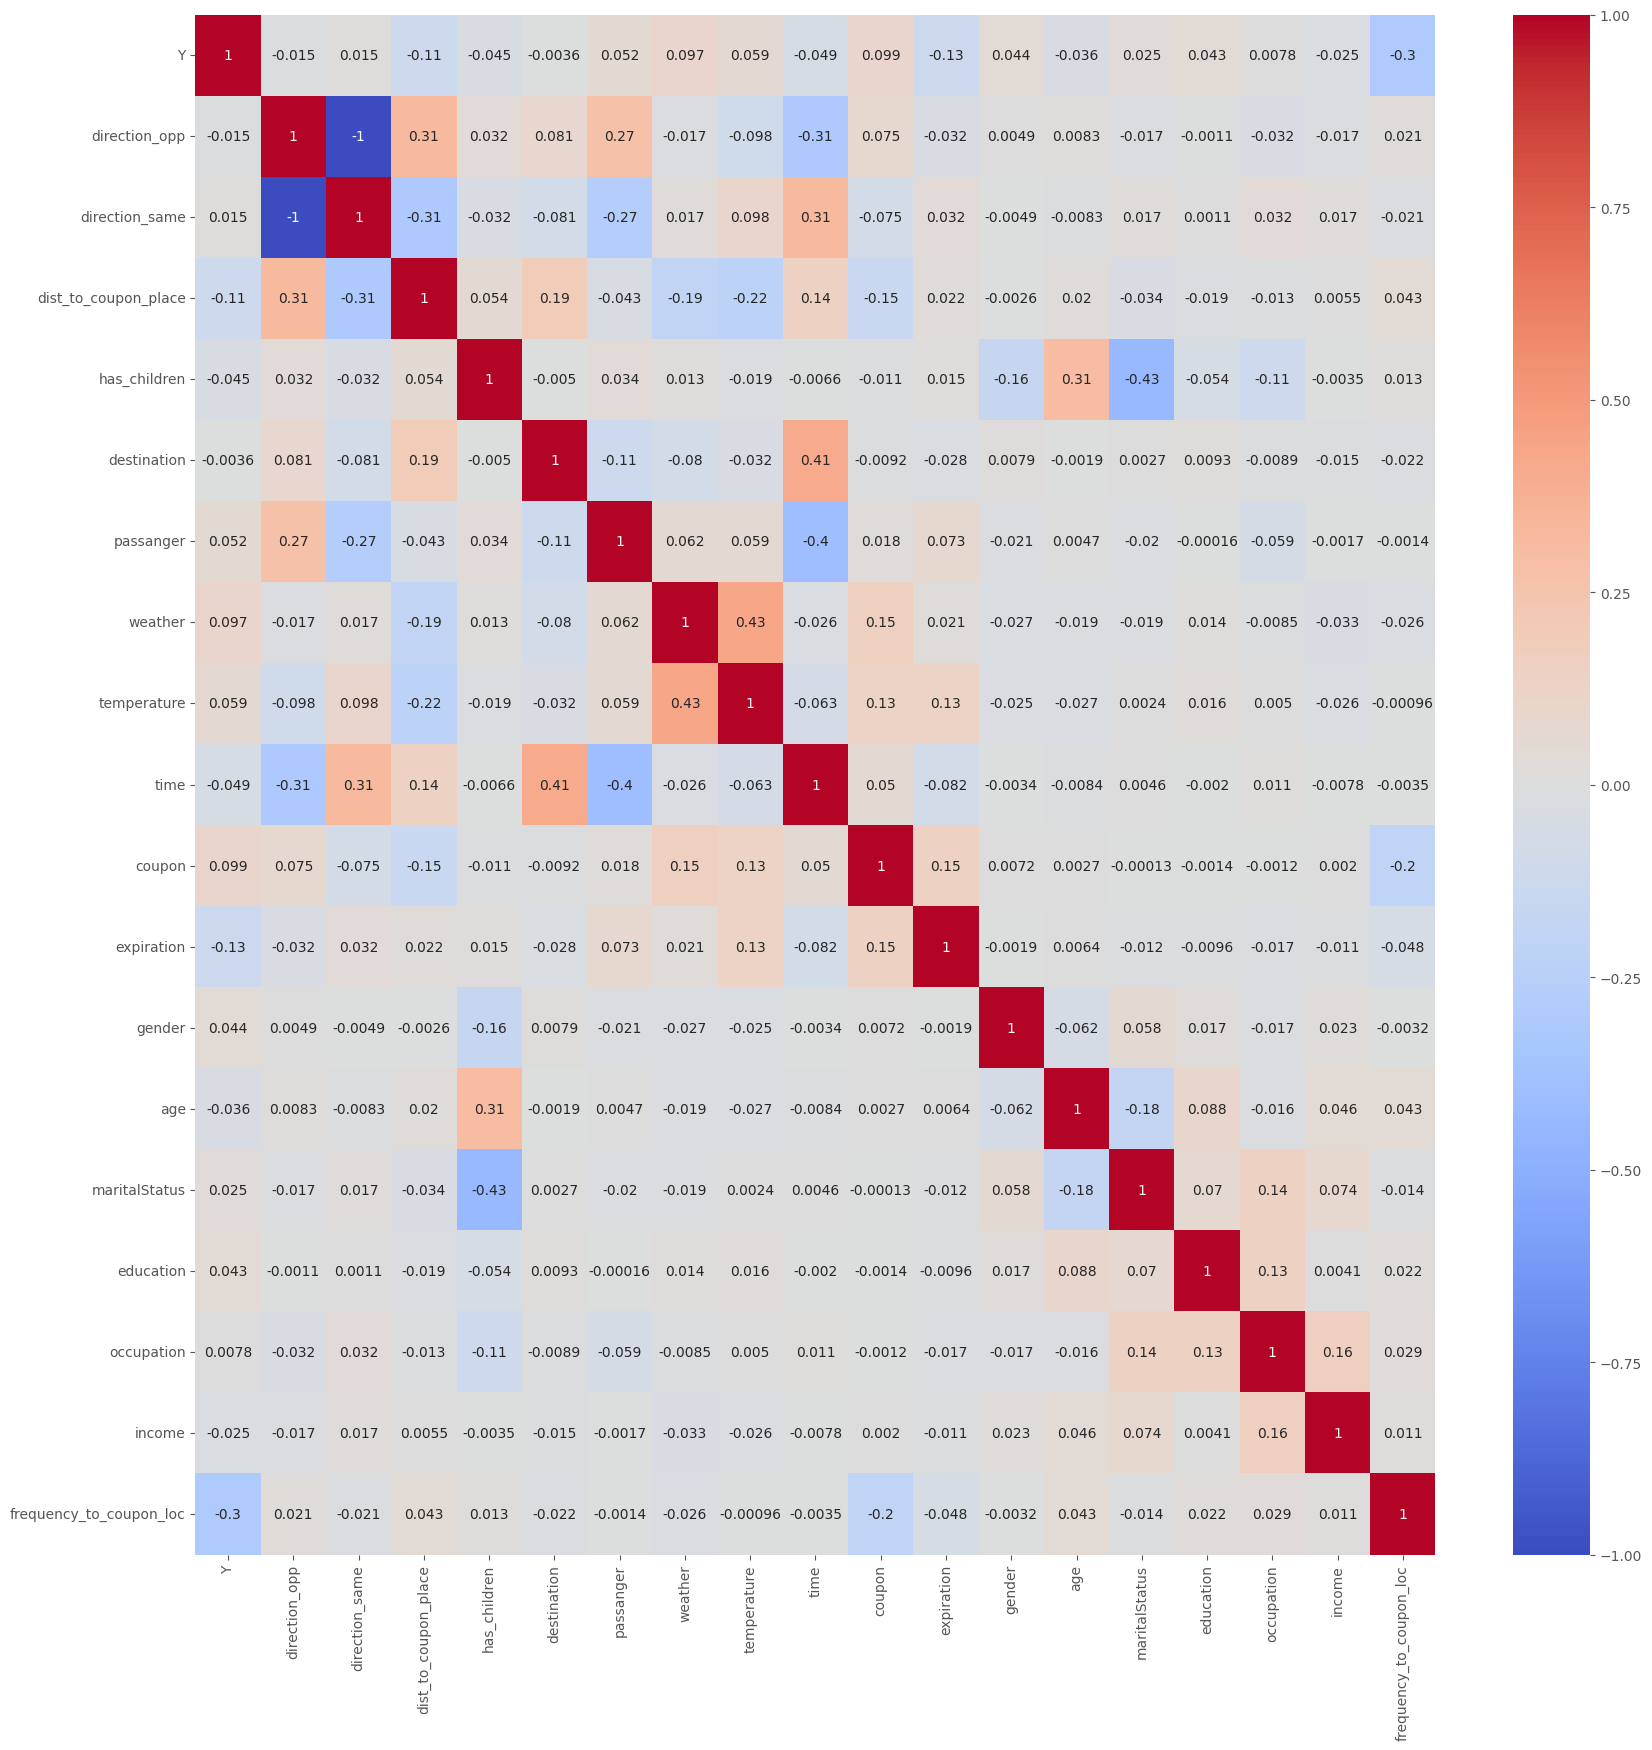

In [66]:
corr_matrix = df_final.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()


##Model building

In [67]:
# Define X to contain all columns of df_final except 'Y'
X = df_final.drop(columns=['Y','direction_opp'])

# Define y to contain the 'Y' column of df_final
y = df_final['Y']

X=X.values

# Convert y to numpy array
y = y.values
print(X)


[[ 0.  1.  1. ... 24.  3.  1.]
 [ 0.  1.  1. ... 24.  3.  4.]
 [ 0.  2.  1. ... 24.  3.  0.]
 ...
 [ 1.  1.  0. ... 21.  6.  4.]
 [ 0.  3.  0. ... 21.  6.  4.]
 [ 1.  1.  0. ... 21.  6.  0.]]


In [68]:
#List to store the evaluation metrics of different models
results = []

#Function to update the evaluation metrics of different models
def update_metrics(model_name, accuracy, recall, precision):
    for result in results:
        if result['Model'] == model_name:
            result['Accuracy'] = accuracy
            result['Recall'] = recall
            result['Precision'] = precision
            return
    # If the model doesn't exist in results, append a new entry
    results.append({'Model': model_name, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision})


##Naive Bayes

In [69]:
from collections import defaultdict
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

class NaiveBayes:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.prior = defaultdict(int)
        self.likelihood = defaultdict(lambda: defaultdict(int))

    def data_split(self):
        X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(self.X, self.y, test_size=0.3, shuffle=True)
        return X_train, X_test, y_train, y_test

    def evaluate(self, test, preds):
        accuracy = np.mean(test == preds)
        preds = np.array(preds).astype(int)
        precision = np.sum((test == 1) & (preds == 1)) / np.sum(preds == 1)
        recall = np.sum((test == 1) & (preds == 1)) / np.sum(test == 1)
        update_metrics('Naive Bayes', accuracy, recall, precision)
        return accuracy, precision, recall

    def roc(self):
        preds = []
        for sample in self.X_test:
            posteriors = []
            for cls in self.classes:
                likelihood = 1
                for feature_idx, feature_val in enumerate(sample):
                    likelihood *= self.likelihood[cls][(feature_idx, feature_val)]
                posterior = likelihood * self.prior[cls]
                posteriors.append(posterior)
            preds.append(posteriors)

        preds = np.array(preds)
        y_true = np.array(self.y_test)

        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(y_true, preds[:, 1])
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc='lower right')
        plt.show()

    def confusion_matrix(self, y, y_pred):
        y_pred = np.array(y_pred).astype(int)
        tp = np.sum((y == 1) & (y_pred == 1))
        fp = np.sum((y == 0) & (y_pred == 1))
        tn = np.sum((y == 0) & (y_pred == 0))
        fn = np.sum((y == 1) & (y_pred == 0))

        #Define the confusion matrix
        conf_matrix = np.array([[tp, fn], [fp, tn]])

        #Define target class labels
        classes = ['Positive', 'Negative']

        #Plot confusion matrix
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Greens)
        plt.title('Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes)
        plt.yticks(tick_marks, classes)

        #Add text annotations
        thresh = conf_matrix.max() / 2.
        for i, j in np.ndindex(conf_matrix.shape):
            plt.text(j, i, format(conf_matrix[i, j], 'd'),
              horizontalalignment="center",
              color="white" if conf_matrix[i, j] > thresh else "black")

        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.tight_layout()
        plt.show()

    def fit(self):
        n_samples, n_features = self.X.shape
        self.classes = np.unique(self.y)
        self.X_train, self.X_test, self.y_train, self.y_test = self.data_split()

        # Calculate prior probabilities
        for cls in self.classes:
            self.prior[cls] = np.sum(self.y_train==cls) / n_samples

        # Calculate likelihood probabilities
        for feature_idx in range(n_features):
            for feature_val in np.unique(self.X_train[:, feature_idx]):
                for cls in self.classes:
                    # Count occurrences of feature_val for each class
                    occurrences = np.sum((self.y_train == cls) & (self.X_train[:, feature_idx] == feature_val))
                    total_cls_samples = np.sum(self.y_train==cls)
                    self.likelihood[cls][(feature_idx, feature_val)] = occurrences / total_cls_samples

    def predict(self):
        preds = []
        for sample, true_label in zip(self.X_test, self.y_test):
            posteriors = []
            for cls in self.classes:
                likelihood = 1
                for feature_idx, feature_val in enumerate(sample):
                    likelihood *= self.likelihood[cls][(feature_idx, feature_val)]
                posterior = likelihood * self.prior[cls]
                posteriors.append(posterior)
            preds.append(self.classes[np.argmax(posteriors)])
        accuracy, precision, recall = self.evaluate(self.y_test, preds)
        self.confusion_matrix(self.y_test,preds)
        print('Accuracy:', accuracy)
        print('Precision:', precision)
        print('Recall:', recall)


In [70]:
nb = NaiveBayes(X,y)
nb.fit()

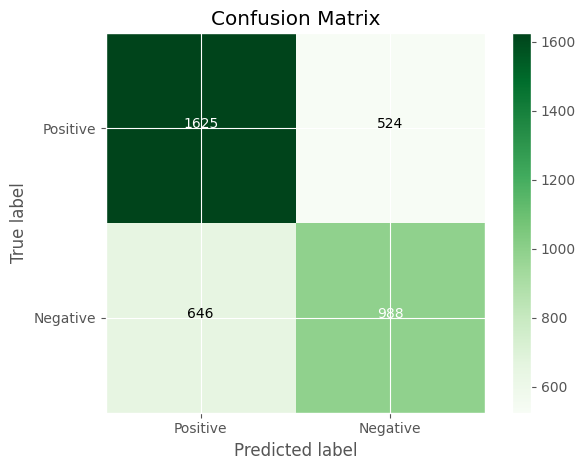

Accuracy: 0.6907216494845361
Precision: 0.7155438132981066
Recall: 0.7561656584457888


In [71]:
nb.predict()

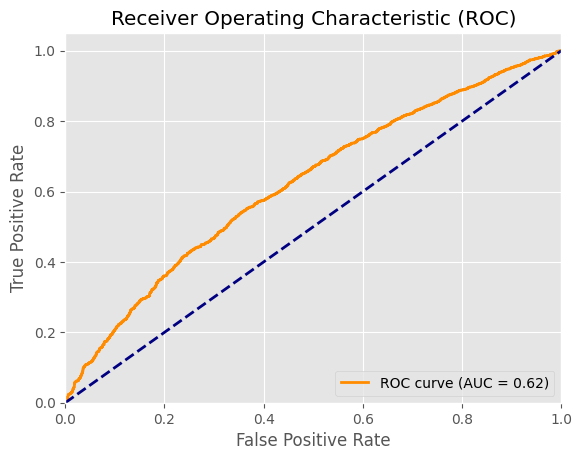

In [72]:
nb.roc()

##Logistic Regression

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from dataclasses import dataclass
from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE



@dataclass
class LogisticRegression:
    learning_rate: float
    tolerance: float
    max_iteration: int

    def __post_init__(self):
        self.w = None
        self.errors = []


    def data_reader(self, df_final):
        X = df_final.drop(['Y', 'direction_opp'], axis=1).astype(int)
        y = df_final['Y']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        smote = SMOTE(random_state=42)
        self.X_train, self.y_train = smote.fit_resample(self.X_train, self.y_train)


    def add_x0(self, X):
        return np.column_stack([np.ones(X.shape[0]), X])

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        cost = -np.sum(y * np.log(sig) + (1 - y) * np.log(1 - sig))
        return cost

    def gradient(self, X, y):

        sig = self.sigmoid(X.dot(self.w))
        grad = X.T.dot(sig - y) / len(y)
        return grad

    def gradient_descent(self, X, y):
        self.errors = []
        last_error = float('inf')
        for iteration in tqdm(range(self.max_iteration)):
            self.w = self.w - self.learning_rate * self.gradient(X, y)
            current_error = self.cost_function(X, y)
            diff = last_error - current_error
            last_error = current_error
            self.errors.append(last_error)

            if diff < self.tolerance:
                print("Model has stopped learning.")
                break
        self.plot_cost(self.errors)


    def fit(self, df_final):
        self.data_reader(df_final)
        X_train = self.add_x0(self.X_train)
        self.w = np.ones(X_train.shape[1])
        self.gradient_descent(X_train, self.y_train)
        y_hat = self.predict(X_train)
        self.X_test = self.add_x0(self.X_test)
        #self.y_test = y_test
        accuracy, precision, recall = self.evaluate(self.y_train, y_hat)
        print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")

    def plot_cost(self, errors):
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(errors)), errors, label='Training Cost')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Trend')
        plt.legend()
        plt.show()

    def predict(self, X):
        if X.shape[1] != len(self.w):
            X = self.add_x0(X)
        sig = self.sigmoid(X.dot(self.w))
        return np.round(sig)

    def evaluate(self, y, y_hat):
        accuracy = np.mean(y == y_hat)
        precision = np.sum((y_hat == 1) & (y == y_hat)) / (np.sum(y_hat == 1) + 1e-7)  # Avoid division by zero
        recall = np.sum((y_hat == 1) & (y == y_hat)) / (np.sum(y == 1) + 1e-7)
        update_metrics('Logistic Regression', accuracy, recall, precision)
        return accuracy, precision, recall

    def scatterPlt(self, X, y):
        if self.w is None:
            print("Model is not trained. Please fit the model first.")
            return
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='k')
        x1_min, x1_max = X[:, 0].min(), X[:, 0].max(),
        x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        grid = self.add_x0(grid)  # Adding x0 = 1 for each example
        probs = self.sigmoid(grid.dot(self.w)).reshape(xx1.shape)
        plt.contour(xx1, xx2, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=0.6)

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Scatter Plot with Decision Boundary')
        plt.show()

    def plot3D(self, X, y):
        if self.w is None:
            print("Model is not trained. Please fit the model first.")
            return

        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolor='k')

        x1_min, x1_max = X[:, 0].min(), X[:, 0].max(),
        x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        grid = self.add_x0(grid)  # Adding x0 = 1 for each example in grid
        probs = self.sigmoid(grid.dot(self.w)).reshape(xx1.shape)

        ax.plot_surface(xx1, xx2, probs, cmap='RdBu', edgecolor='none', alpha=0.5)

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Predicted Probability')
        ax.set_title('3D Plot of Predicted Probabilities')
        plt.show()
    def confusion_matrix(self,y_true, y_pred):
        TP = np.sum((y_true == 1) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))
        return np.array([[TN, FP], [FN, TP]])


    def custom_roc_curve(self,y_true, y_scores):
        thresholds = sorted(set(y_scores), reverse=True)
        tprs = []
        fprs = []

        for threshold in thresholds:
            y_pred = (y_scores >= threshold).astype(int)
            TP = np.sum((y_true == 1) & (y_pred == 1))
            TN = np.sum((y_true == 0) & (y_pred == 0))
            FP = np.sum((y_true == 0) & (y_pred == 1))
            FN = np.sum((y_true == 1) & (y_pred == 0))

            TPR = TP / (TP + FN) if (TP + FN) else 0
            FPR = FP / (FP + TN) if (FP + TN) else 0

            tprs.append(TPR)
            fprs.append(FPR)

        return np.array(fprs), np.array(tprs), np.array(thresholds)

    def custom_auc(self,fpr, tpr):
          sorted_indices = np.argsort(fpr)
          sorted_fpr = fpr[sorted_indices]
          sorted_tpr = tpr[sorted_indices]
          area = np.trapz(sorted_tpr, sorted_fpr)
          return area


    def plot_confusion_matrix(self):
        if self.X_test is None or self.y_test is None:
            print("Test data not found. Please check if the model has been fitted.")
            return

        y_hat_test = self.predict(self.X_test)
        cm = self.confusion_matrix(self.y_test, y_hat_test)
        plt.figure(figsize=(6,6))
        sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True, xticklabels=['False', 'True'], yticklabels=['False', 'True'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix')
        plt.show()

    def plot_roc_curve_1(self):
            if self.X_test is None or self.y_test is None:
                print("Test data not found. Please check if the model has been fitted.")
                return

            y_hat_test_prob = self.sigmoid(self.X_test.dot(self.w))
            fpr, tpr, thresholds = self.custom_roc_curve(self.y_test, y_hat_test_prob)
            roc_auc = self.custom_auc(fpr, tpr)

            plt.figure(figsize=(8,6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic')
            plt.legend(loc="lower right")
            plt.show()

    def manual_k_fold_split(self,data_size, k):
        indices = np.arange(data_size)
        np.random.shuffle(indices)
        fold_sizes = data_size // k * np.ones(k, dtype=int)
        fold_sizes[:data_size % k] += 1
        current = 0
        folds = []
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            folds.append(indices[start:stop])
            current = stop
        return folds

    def plot_learning_curves_kfold(self, n_splits=2):
        if self.X_train is None or self.y_train is None:
            print("Data not found. Please load data first.")
            return

        m_values = np.exp(np.linspace(np.log(10), np.log(len(self.X_train)), 5)).astype(int)
        #print(m_values)
        train_errors, val_errors = [], []

        for m in m_values:
            fold_train_errors, fold_val_errors = [], []
            folds = self.manual_k_fold_split(m, n_splits)

            for i in range(n_splits):
                val_indices = folds[i]
                train_indices = np.hstack([folds[j] for j in range(n_splits) if j != i])

                X_train_fold = self.add_x0(self.X_train.iloc[train_indices])
                y_train_fold = self.y_train.iloc[train_indices]
                X_val_fold = self.add_x0(self.X_train.iloc[val_indices])
                y_val_fold = self.y_train.iloc[val_indices]

                self.w = np.zeros(X_train_fold.shape[1])

                self.gradient_descent(X_train_fold, y_train_fold)

                y_train_predict = self.predict(X_train_fold)
                y_val_predict = self.predict(X_val_fold)

                train_acc = self.evaluate(y_train_fold, y_train_predict)[0]
                val_acc = self.evaluate(y_val_fold, y_val_predict)[0]

                fold_train_errors.append(1 - train_acc)
                fold_val_errors.append(1 - val_acc)

            train_errors.append(np.mean(fold_train_errors))
            val_errors.append(np.mean(fold_val_errors))

        plt.figure(figsize=(10, 6))
        plt.plot(m_values, train_errors, label='Train Error')
        plt.plot(m_values, val_errors, label='Validation Error')
        plt.xscale('log')
        plt.xlabel('Training Set Size')
        plt.ylabel('Error')
        plt.title('Learning Curves with K-Fold Cross-Validation')
        plt.legend()
        plt.show()



  0%|          | 0/50000 [00:00<?, ?it/s]<ipython-input-73-d7337d41dcd2>:39: RuntimeWarning: divide by zero encountered in log
  cost = -np.sum(y * np.log(sig) + (1 - y) * np.log(1 - sig))
<ipython-input-73-d7337d41dcd2>:54: RuntimeWarning: invalid value encountered in scalar subtract
  diff = last_error - current_error
<ipython-input-73-d7337d41dcd2>:39: RuntimeWarning: divide by zero encountered in log
  cost = -np.sum(y * np.log(sig) + (1 - y) * np.log(1 - sig))
<ipython-input-73-d7337d41dcd2>:54: RuntimeWarning: invalid value encountered in scalar subtract
  diff = last_error - current_error
<ipython-input-73-d7337d41dcd2>:39: RuntimeWarning: divide by zero encountered in log
  cost = -np.sum(y * np.log(sig) + (1 - y) * np.log(1 - sig))
<ipython-input-73-d7337d41dcd2>:54: RuntimeWarning: invalid value encountered in scalar subtract
  diff = last_error - current_error
<ipython-input-73-d7337d41dcd2>:39: RuntimeWarning: divide by zero encountered in log
  cost = -np.sum(y * np.log(si

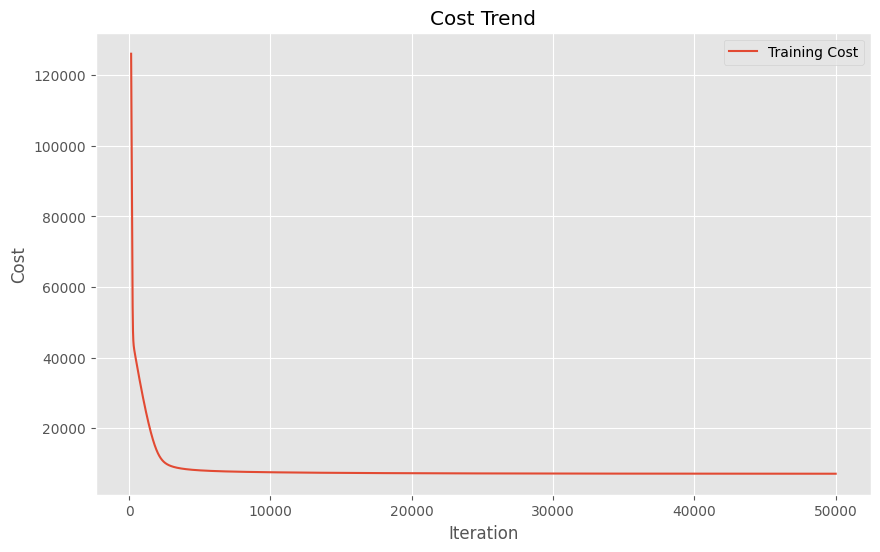

Accuracy: 0.6670440689775301, Precision: 0.6626526458503621, Recall: 0.6805434593157892


In [74]:
lr = LogisticRegression(learning_rate=0.001, tolerance=0.000001, max_iteration=50000)
lr.fit(df_final)

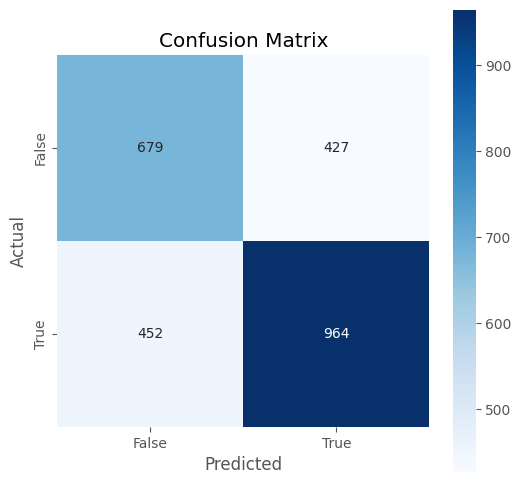

In [75]:
lr.plot_confusion_matrix()

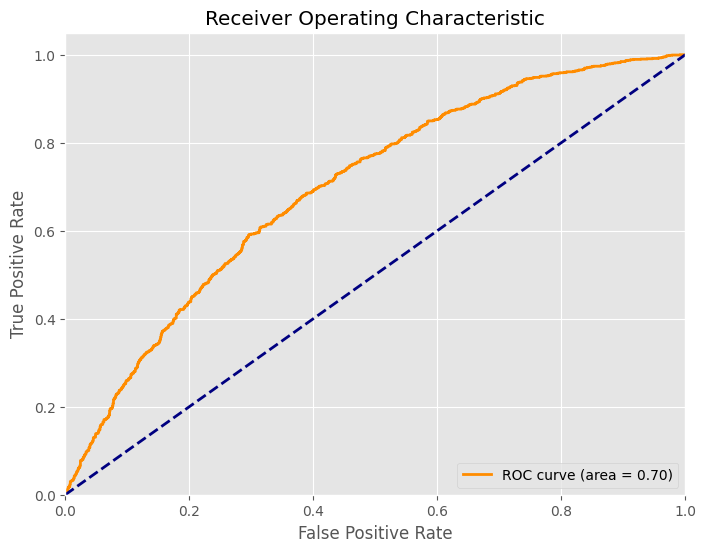

In [76]:
lr.plot_roc_curve_1()

In [77]:
lr.plot_learning_curves_kfold()

 36%|███▌      | 17823/50000 [00:14<00:27, 1188.53it/s]


KeyboardInterrupt: 

##Soft Margin SVM

In [ ]:
import numpy as np
from scipy.optimize import minimize, Bounds
import matplotlib.pyplot as plt

class SoftMarginSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.alpha = None
        self.w = None
        self.intercept = None
        self.support_vectors = None
        self.support_labels = None

    def train_scaling(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        scaled_X = (X - mean) / std
        return scaled_X

    def ld0(self, G, alpha):
        return alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))

    def derivative(self, G, alpha):
        return np.ones(len(alpha)) - alpha.dot(G)

    def fit(self, X, y):
        y = np.where(y <= 0, -1, 1)
        X = self.train_scaling(X)
        Xy = X * y[:, np.newaxis]
        GramXY = Xy.dot(Xy.T)

        alpha = np.ones(X.shape[0])
        bounds_alpha = Bounds(np.zeros(X.shape[0]), np.full(X.shape[0], self.C))

        constraints = ({'type': 'eq', 'fun': lambda a: -np.dot(a, y), 'jac': lambda a: -y})

        optimizer = minimize(fun=lambda alpha: self.ld0(GramXY, alpha),
                             x0=alpha,
                             jac=lambda alpha: self.derivative(GramXY, alpha),
                             constraints=constraints,
                             bounds=bounds_alpha,
                             method='SLSQP')
        self.alpha = optimizer.x
        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis=0)

        epsilon = 1e-4
        self.support_vectors = X[self.alpha > epsilon]
        self.support_labels = y[self.alpha > epsilon]

        signdist = np.matmul(self.support_vectors, self.w)
        mindist = np.argmin(signdist)
        self.intercept = np.min(signdist)

    def predict(self, X):
        X = self.train_scaling(X)
        decision = np.dot(X, self.w) + self.intercept
        y_pred = np.sign(decision)
        return y_pred

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        y = np.where(y <= 0, -1, 1)
        accuracy = np.mean(y_pred == y)
        tp = np.sum((y == 1) & (y_pred == 1))
        fp = np.sum((y == -1) & (y_pred == 1))
        tn = np.sum((y == -1) & (y_pred == -1))
        fn = np.sum((y == 1) & (y_pred == -1))
        print('TP:', tp)
        print('FP:', fp)
        print('TN:', tn)
        print('FN:', fn)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        update_metrics('SVM', accuracy, recall, precision)
        print('Accuracy:', accuracy)
        print('Precision:', precision)
        print('Recall:', recall)

    def plot_decision_boundary(self, X, y):
        sampled_indices = np.random.choice(len(X), size=min(30, len(X)), replace=False)
        X_sampled = X[sampled_indices]
        y_sampled = y[sampled_indices]
        plt.scatter(X_sampled[:, 0], X_sampled[:, 1], c=y_sampled, cmap=plt.cm.Paired, marker='o', label='Data points')

        plt.scatter(self.support_vectors[:, 0], self.support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support vectors')

        w1, w2 = self.w[:2]
        slope = -w1 / w2
        intercept = -self.intercept / w2

        xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
        x_decision = np.linspace(xmin, xmax, 100)
        y_decision = slope * x_decision + intercept
        plt.plot(x_decision, y_decision, 'k-', label='Decision boundary')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Soft Margin SVM Decision Boundary')
        plt.legend()
        plt.show()


In [ ]:
import matplotlib.pyplot as plt
def plot_decision_boundary_3d(model, X, y):

    sampled_indices = np.random.choice(len(X), size=min(30, len(X)), replace=False)
    X_sampled = X[sampled_indices]
    y_sampled = y[sampled_indices]
    print(X_sampled)
    x_min, x_max = X_sampled[:, 0].min() - 1, X_sampled[:, 0].max() + 1
    y_min, y_max = X_sampled[:, 1].min() - 1, X_sampled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    z = (-model.intercept - model.w[0] * xx - model.w[1] * yy) / model.w[2]

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_sampled[y_sampled == 0][:, 0], X_sampled[y_sampled == 0][:, 1], X_sampled[y_sampled == 0][:, 2], c='r', marker='o', label='Class -1',s=50, alpha=0.5)
    ax.scatter(X_sampled[y_sampled == 1][:, 0], X_sampled[y_sampled == 1][:, 1], X_sampled[y_sampled == 1][:, 2], c='b', marker='o', label='Class 1', alpha=0.5)

    # Plot the separating hyperplane
    ax.plot_surface(xx, yy, z, alpha=0.5)
    ax.view_init(elev=30, azim=60)

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Soft Margin SVM Decision Boundary (3D)')
    ax.legend()

    plt.show()


In [ ]:
#Perform Stratified Sampling to get sample of dataset without class imbalance

from sklearn.model_selection import StratifiedShuffleSplit

# Calculate class proportions
class_counts = df_final['Y'].value_counts()
class_proportions = class_counts / len(df_final)

#Sample size
total_samples = 3000

# Calculate number of samples per class
samples_per_class = (class_proportions * total_samples).astype(int)

# Perform stratified sampling
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for train_index, test_index in sss.split(df_final, df_final['Y']):
    sampled_data = df_final.iloc[train_index]
    sampled_class_counts = sampled_data['Y'].value_counts()
    print(sampled_class_counts)  # Check if class proportions are balanced


Y
1    3579
0    2726
Name: count, dtype: int64


In [ ]:
# Separate features (X) and target variable (y) from sampled data
X_sample = sampled_data.drop(columns=['Y'])
y_sample = sampled_data['Y'].values

In [ ]:
#Feature selection from the sampled data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Define the number of features to select
k = 10

# Perform feature selection using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_sample, y_sample)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Print the selected feature indices
print("Selected feature indices:", selected_indices)

Selected feature indices: [ 2  3  6  7  8  9 10 12 14 17]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_sample, stratify=y_sample, test_size=0.3, random_state=42)

In [ ]:
svm_model = SoftMarginSVM(C=2000.0)
svm_model.fit(X_train, y_train)

In [ ]:
# Evaluate the model
svm_model.evaluate(X_test, y_test)

# Plot the decision boundary
svm_model.plot_decision_boundary(X_test, y_test)

In [ ]:
#Plotting decision boundary in 3D
plot_decision_boundary_3d(svm_model, X_train, y_train)

##Note:
SoftMargin SVM does not work for this problem because it is a distance-based algorithm while the dataset is completely categorical. Although the features were encoded with numerical values, it still does not work as good as with numerical features. Also, since it is also computationally expensive, the datatset we fed the model had to be sampled and some features had to be removed which also could be a reason for the failure in the model performance given the limited information. This proves that Soft Margin SVM would not be the most suitable algorithm in case categorical features particularly with higher dimensions.

##Neural Network

###Description:

1.   Created a common type of model, sequential model, which is a linear stack of layers.
2.   In this neural network the dense layers are fully connected layers where each neuron is connected to every neuron in the previous layer. The model design has three dense layers with 128, 64, and 1 neuron respectively.
3.  Used the ReLU activation function for the hidden layers and the sigmoid activation function for the output layer because the ReLU is effective for capturing non-linearities in the data(which is highly possible given the high dimensional data), while sigmoid is suitable for binary classification tasks like this one, where the output is either 0 or 1.
4.  Batch normalization and dropout layers with a dropout rate of 0.2 are added after the first and second dense layers.





In [78]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [80]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

#Train the Model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val))

#Evaluate the Model
loss, accuracy, recall, precision = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
update_metrics('Neural Network', accuracy, recall, precision)
print("Test Accuracy:", accuracy)
print("Test Recall:", recall)
print("Test Precision:", precision)

Epoch 1/500
221/221 [==============================] - 3s 5ms/step - loss: 0.7070 - accuracy: 0.6100 - recall: 0.6924 - precision: 0.6504 - val_loss: 0.6278 - val_accuracy: 0.6693 - val_recall: 0.8147 - val_precision: 0.6639
Epoch 2/500
221/221 [==============================] - 1s 3ms/step - loss: 0.6421 - accuracy: 0.6472 - recall: 0.7522 - precision: 0.6720 - val_loss: 0.6107 - val_accuracy: 0.6750 - val_recall: 0.8117 - val_precision: 0.6703
Epoch 3/500
221/221 [==============================] - 1s 3ms/step - loss: 0.6258 - accuracy: 0.6642 - recall: 0.7778 - precision: 0.6817 - val_loss: 0.6108 - val_accuracy: 0.6750 - val_recall: 0.8045 - val_precision: 0.6724
Epoch 4/500
221/221 [==============================] - 1s 3ms/step - loss: 0.6132 - accuracy: 0.6696 - recall: 0.7860 - precision: 0.6847 - val_loss: 0.6088 - val_accuracy: 0.6795 - val_recall: 0.8414 - val_precision: 0.6667
Epoch 5/500
221/221 [==============================] - 1s 3ms/step - loss: 0.6098 - accuracy: 0.6764

In [ ]:
print("Training History:")
print(history.history)

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#Performance Metrics of the models

In [ ]:
#Dataframe of performance metric
results_df = pd.DataFrame(results)
results_df